In [20]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca\\64'

In [62]:
cd ..

C:\Users\sakthi\hem\hem\pca


In [22]:
from Bio.PDB import PDBParser
from collections import Counter

pdb_file = "bindingpocket1.pdb"

parser = PDBParser(QUIET=True)
structure = parser.get_structure("pocket", pdb_file)

# Extract all residue names (3-letter codes)
residues = [res.get_resname() for model in structure
                                     for chain in model
                                     for res in chain
                                     if res.get_id()[0] == " "]

# Count frequencies
freq = Counter(residues)

# Optional: convert 3-letter to 1-letter codes
res3to1 = {
    'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C',
    'GLU': 'E', 'GLN': 'Q', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
    'LEU': 'L', 'LYS': 'K', 'MET': 'M', 'PHE': 'F', 'PRO': 'P',
    'SER': 'S', 'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
}

residues_1letter = [res3to1.get(r, 'X') for r in residues]
freq_1letter = Counter(residues_1letter)

print("Amino acid frequency in binding pocket:")
for aa, count in freq_1letter.items():
    print(f"{aa}: {count}")


Amino acid frequency in binding pocket:
K: 1
L: 2
V: 1
I: 2
E: 2
S: 1
R: 1
D: 1
M: 1
Y: 1
T: 1
G: 1
X: 1


In [23]:
all_residues = []

for i in range(1, 7):  # Assuming you have binding_pocket1.pdb ... binding_pocket6.pdb
    pdb_file = f"bindingpocket{i}.pdb"
    structure = parser.get_structure(f"pocket{i}", pdb_file)
    residues = [res.get_resname() for model in structure
                                         for chain in model
                                         for res in chain
                                         if res.get_id()[0] == " "]
    all_residues.extend(residues)

# Then count total frequencies
all_residues_1letter = [res3to1.get(r, 'X') for r in all_residues]
total_freq = Counter(all_residues_1letter)


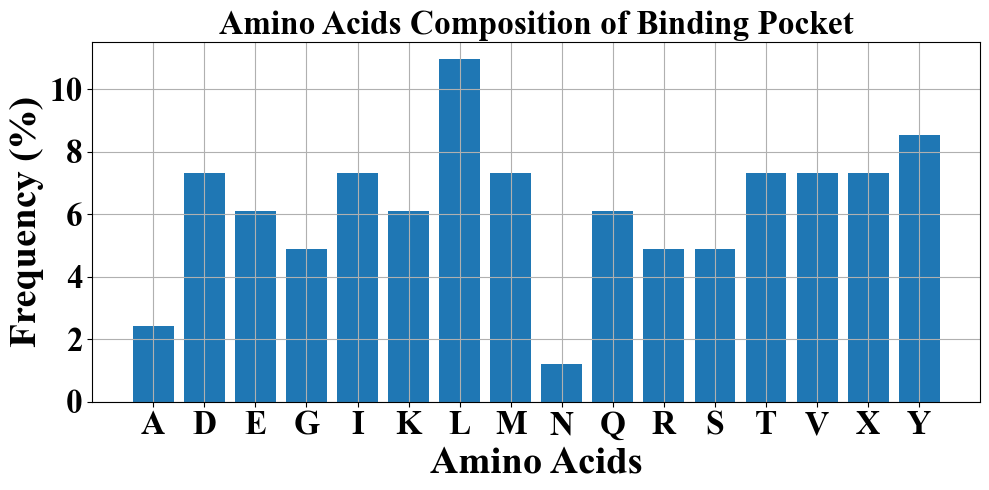

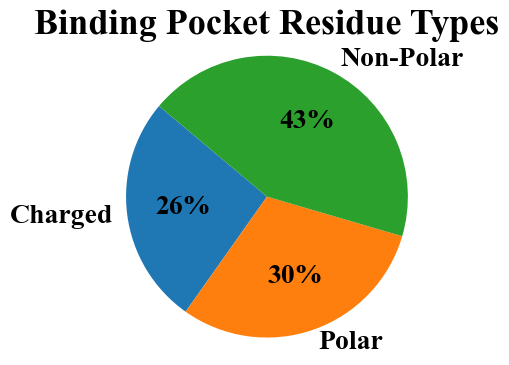

In [63]:
import matplotlib.pyplot as plt

# Convert counts to % for plotting
total = sum(total_freq.values())
aa_sorted = sorted(total_freq.keys())
percentages = [100 * total_freq[aa] / total for aa in aa_sorted]

plt.figure(figsize=(10, 5))
plt.bar(aa_sorted, percentages)
plt.xlabel("Amino Acids", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Frequency (%)", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=24, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=24, fontweight='bold', fontname='Times New Roman')

plt.title("Amino Acids Composition of Binding Pocket", fontsize=24, fontweight='bold', fontname='Times New Roman')
plt.grid(True)
plt.tight_layout()
plt.savefig("amino_acid_composition_binding_pocket.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()




grouped_freq = {'Charged': 0, 'Polar': 0, 'Non-Polar': 0}

charged = ['R', 'K', 'D', 'E', 'H']
polar = ['S', 'T', 'N', 'Q', 'Y', 'C']
nonpolar = ['A', 'V', 'L', 'I', 'M', 'F', 'W', 'P', 'G']

for aa, count in total_freq.items():
    if aa in charged:
        grouped_freq['Charged'] += count
    elif aa in polar:
        grouped_freq['Polar'] += count
    elif aa in nonpolar:
        grouped_freq['Non-Polar'] += count

# Convert to %
total = sum(total_freq.values())
grouped_freq_percent = {k: v * 100 / total for k, v in grouped_freq.items()}

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_freq_percent.values(),
        labels=grouped_freq_percent.keys(),
        autopct='%1.0f%%',
        startangle=140,
        textprops={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Times New Roman'})

plt.title("Binding Pocket Residue Types", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.axis('equal')

plt.savefig("binding_pocket_residue_types.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()



In [83]:
cd 64/

[WinError 2] The system cannot find the file specified: '64/'
C:\Users\sakthi\hem\hem\pca\115


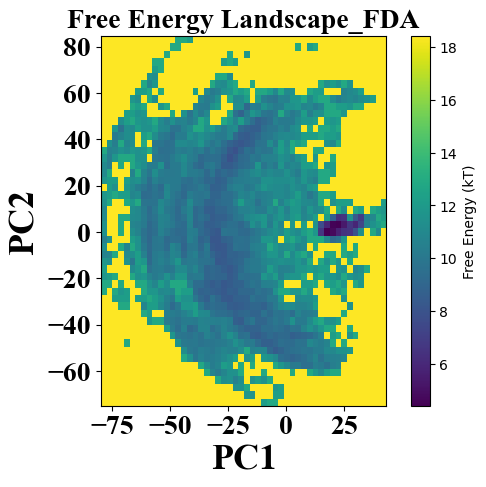

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_FDA', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_FDA.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



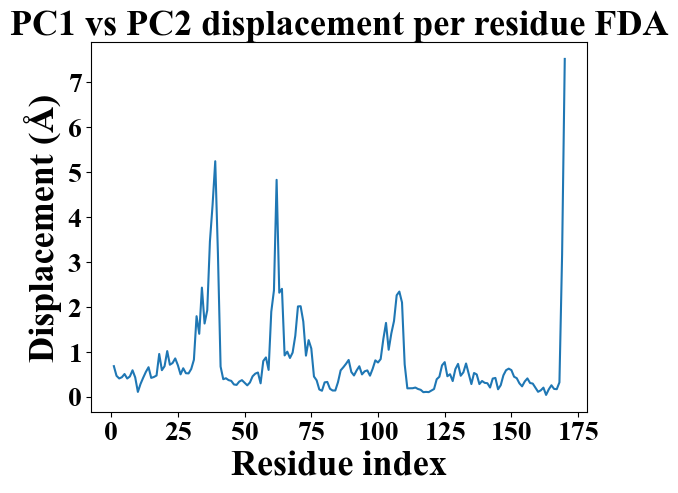

In [85]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue FDA", fontsize=26, fontweight='bold', fontname='Times New Roman')

plt.savefig("PC1 vs PC2 displacement per residue_FDA.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


In [87]:
cd ../5

C:\Users\sakthi\hem\hem\pca\5


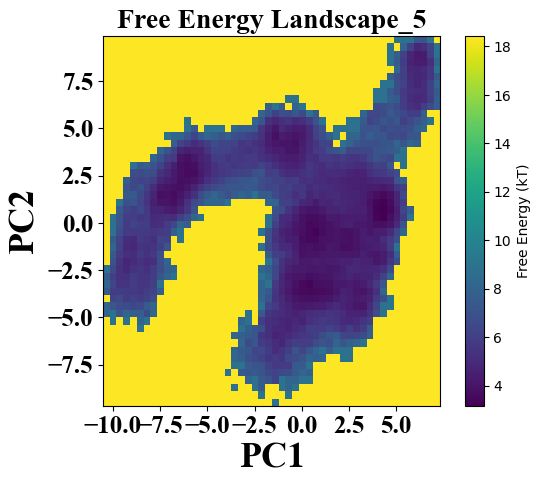

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_5', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_5.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



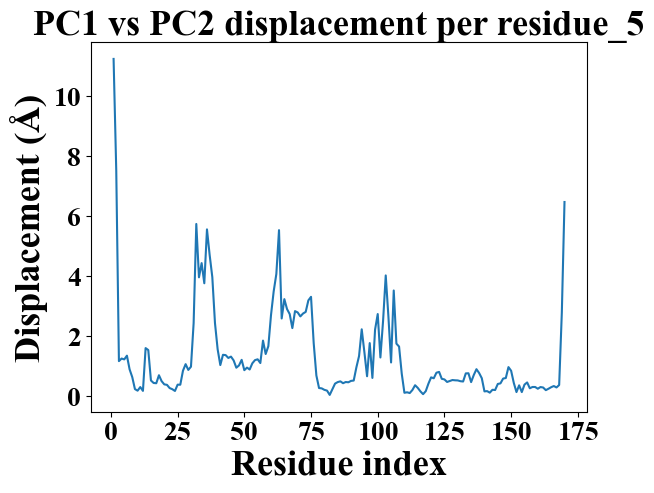

In [88]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue_5", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.savefig("PC1 vs PC2 displacement per residue_5.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



In [102]:
cd ../41

C:\Users\sakthi\hem\hem\pca\41


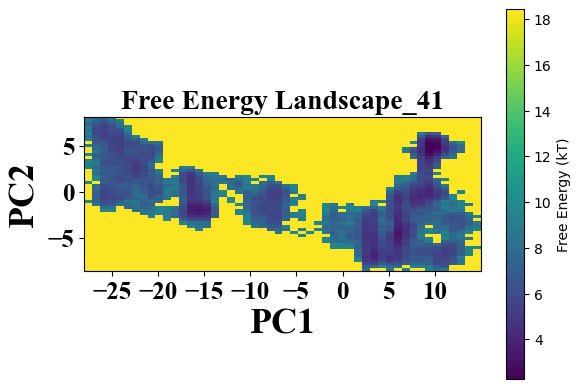

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_41', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_41.png", dpi=300, bbox_inches="tight", transparent=True)


plt.show()



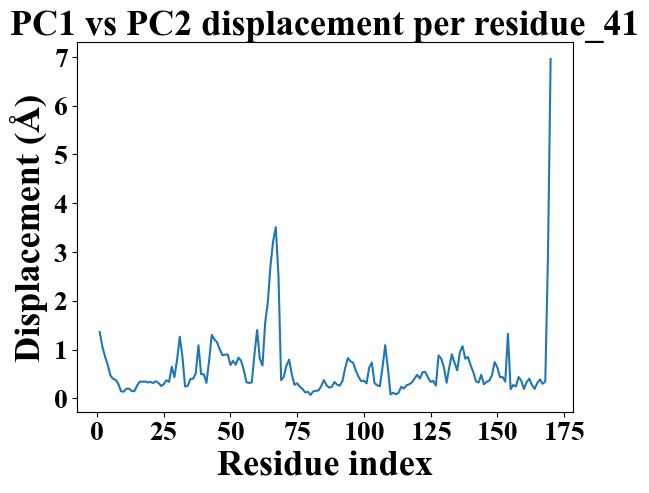

In [90]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue_41", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.savefig("PC1 vs PC2 displacement per residue_41.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



In [91]:
cd ../89

C:\Users\sakthi\hem\hem\pca\89


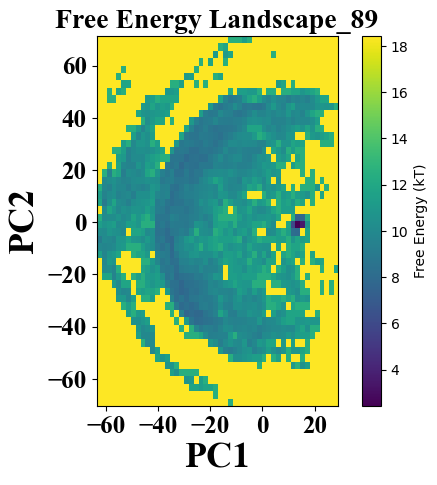

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_89', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_89.png", dpi=300, bbox_inches="tight", transparent=True)


plt.show()



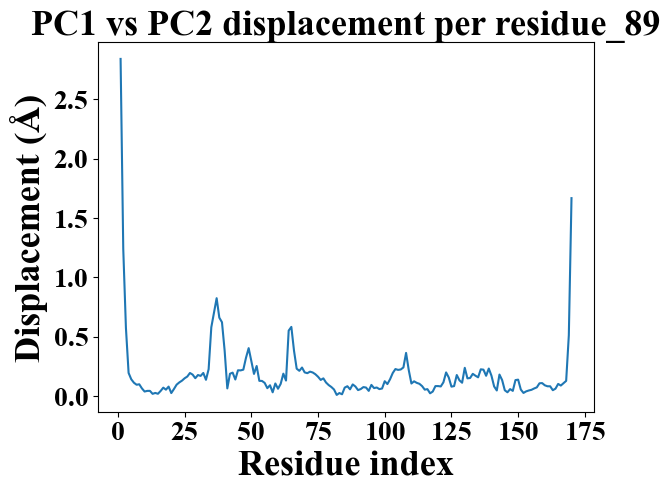

In [92]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue_89", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.savefig("PC1 vs PC2 displacement per residue_89.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



In [97]:
cd ../115


C:\Users\sakthi\hem\hem\pca\115


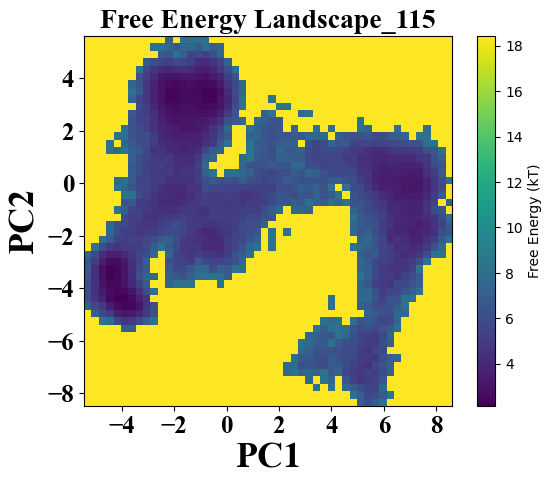

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_115', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_115.png", dpi=300, bbox_inches="tight", transparent=True)


plt.show()



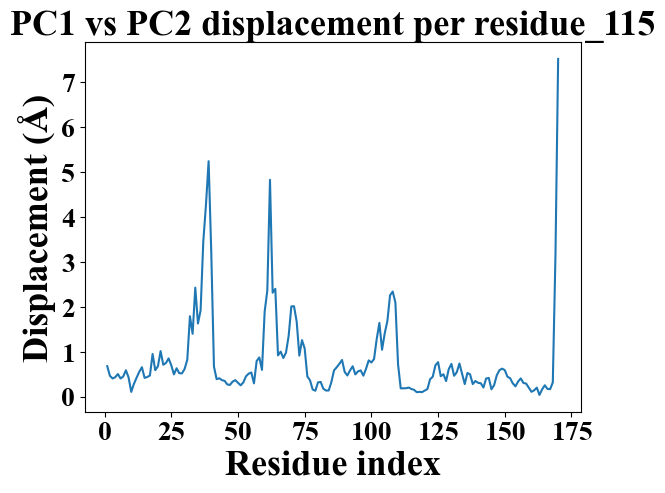

In [101]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue_115", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.savefig("PC1 vs PC2 displacement per residue_115.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



In [104]:
cd ../114

C:\Users\sakthi\hem\hem\pca\114


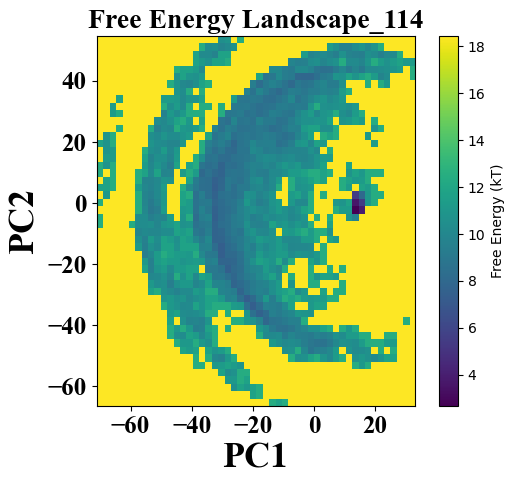

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Load your PC1 and PC2 projections (e.g. from .xvg)
pc1 = np.loadtxt('pc1.xvg', comments=['@','#'], usecols=1)
pc2 = np.loadtxt('pc2.xvg', comments=['@','#'], usecols=1)

# 2D histogram
hist, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Convert to free energy (kT=1 for simplicity)
free_energy = -np.log(hist + 1e-8)  # avoid log(0)

# Plot
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('PC1', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='bold', fontname='Times New Roman')
plt.ylabel('PC2', fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.title('Free Energy Landscape_114', fontsize=20, fontweight='bold', fontname='Times New Roman')

plt.savefig("Free Energy Landscape_114.png", dpi=300, bbox_inches="tight", transparent=True)


plt.show()



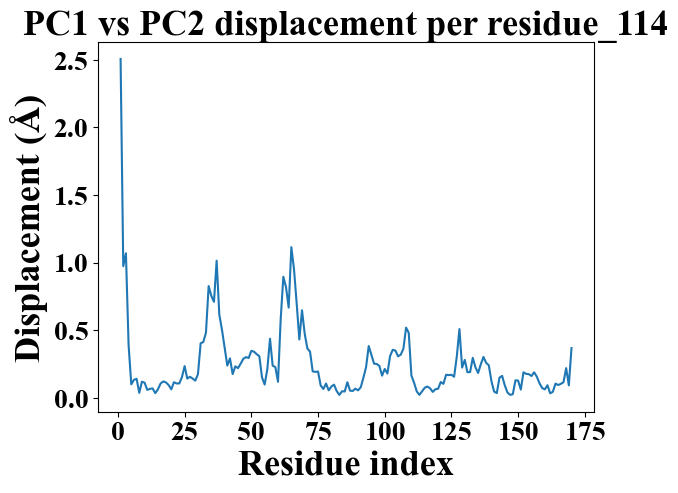

In [107]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Displacement (Å)", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.title("PC1 vs PC2 displacement per residue_114", fontsize=26, fontweight='bold', fontname='Times New Roman')
plt.savefig("PC1 vs PC2 displacement per residue_114.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

plt.show()



In [108]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca\\114'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_xvg(filename):
    """
    Reads a GROMACS .xvg file and returns numerical data (ignores comments/@/legend lines).
    """
    data = []
    with open(filename) as f:
        for line in f:
            if line.startswith(('#', '@')):
                continue
            parts = line.strip().split()
            if len(parts) > 1:
                data.append([float(x) for x in parts])
    return np.array(data)

# -----------------------------
# Load GROMACS PCA data
# -----------------------------
# Replace these with your actual file paths
eigenval_file = "eigenval.xvg"
proj_file     = "proj.xvg"

# Eigenvalues (for scree plot)
eig_data = read_xvg(eigenval_file)
eigenvalues = eig_data[:,1]  # second column usually eigenvalues

# PCA projections (for PC1 vs PC2)
proj_data = read_xvg(proj_file)
pc1 = proj_data[:,1]  # column 2 = PC1
pc2 = proj_data[:,2]  # column 3 = PC2

# -----------------------------
# Plotting
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# ---- (A) Scree Plot ----
axes[0].plot(range(1, len(eigenvalues)+1), eigenvalues, 'k-', marker='o', color='red')
axes[0].set_xlabel("Eigenvector index")
axes[0].set_ylabel("Eigenvalues (nm²)")
axes[0].set_title("A")

# ---- (B) PC1 vs PC2 Scatter ----
axes[1].scatter(pc1, pc2, marker='^', c='orange', edgecolors='k', alpha=0.7)
axes[1].set_xlabel("PC1 (nm)")
axes[1].set_ylabel("PC2 (nm)")
axes[1].set_title("B")

plt.tight_layout()
plt.show()


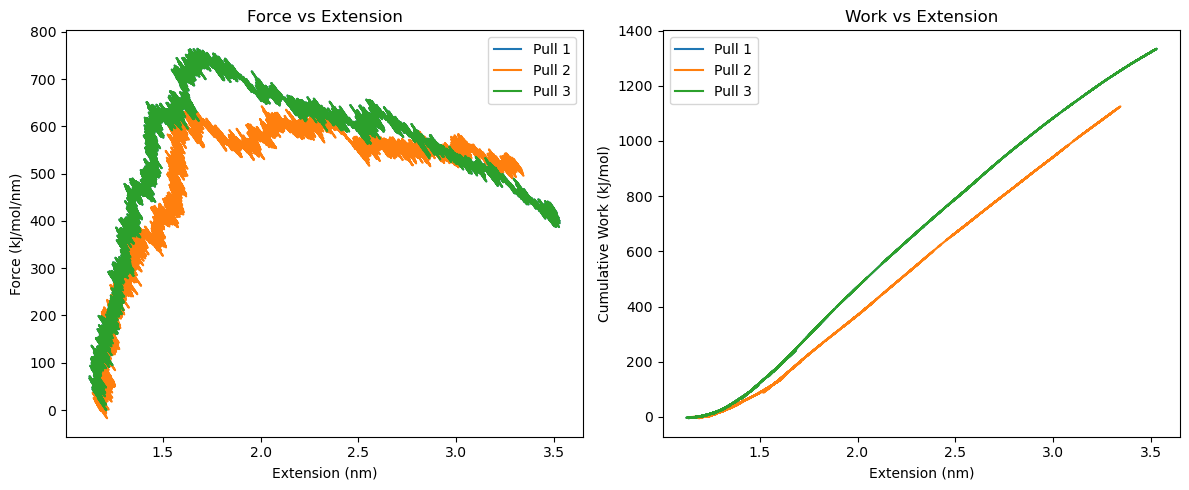

Work values from each pull: [1320.28592681048, 1117.9976760420886, 1320.28592681048]
Estimated free energy difference (ΔG) by Jarzynski equality: 1120.738 kJ/mol


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob

kB = 0.0083145  # Boltzmann constant in kJ/(mol·K)
T = 300         # Temperature in Kelvin (adjust as needed)

def read_xvg(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith(('#','@')):
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                data.append([float(parts[0]), float(parts[1])])
    return np.array(data)

def cumulative_work(force, extension):
    # Numerical integration: sum F_i * delta_x_i
    dx = np.diff(extension)
    # Average force between points for trapezoidal integration
    avg_force = (force[:-1] + force[1:]) / 2
    work = np.cumsum(avg_force * dx)
    # Insert zero at the beginning for initial state
    work = np.insert(work, 0, 0)
    return work

# Adjust these paths to your files for each pull
# Assumes naming like pullf_1.xvg, pullx_1.xvg etc.
num_pulls = 3
force_files = [f"pullf_{i+1}.xvg" for i in range(num_pulls)]
extension_files = [f"pullx_{i+1}.xvg" for i in range(num_pulls)]

work_values = []

plt.figure(figsize=(12,5))

# Plot force vs extension
plt.subplot(1,2,1)
for i in range(num_pulls):
    force_data = read_xvg(force_files[i])
    extension_data = read_xvg(extension_files[i])
    force = force_data[:,1]
    extension = extension_data[:,1]

    plt.plot(extension, force, label=f'Pull {i+1}')

plt.xlabel('Extension (nm)')
plt.ylabel('Force (kJ/mol/nm)')
plt.title('Force vs Extension')
plt.legend()

# Plot cumulative work
plt.subplot(1,2,2)
for i in range(num_pulls):
    force_data = read_xvg(force_files[i])
    extension_data = read_xvg(extension_files[i])
    force = force_data[:,1]
    extension = extension_data[:,1]

    work = cumulative_work(force, extension)
    work_values.append(work[-1])  # total work done in this pull
    plt.plot(extension, work, label=f'Pull {i+1}')

plt.xlabel('Extension (nm)')
plt.ylabel('Cumulative Work (kJ/mol)')
plt.title('Work vs Extension')
plt.legend()
plt.tight_layout()
plt.show()

# Jarzynski free energy estimate
beta = 1/(kB * T)
exp_terms = np.exp(-beta * np.array(work_values))
deltaG = - (1/beta) * np.log(np.mean(exp_terms))

print(f"Work values from each pull: {work_values}")
print(f"Estimated free energy difference (ΔG) by Jarzynski equality: {deltaG:.3f} kJ/mol")


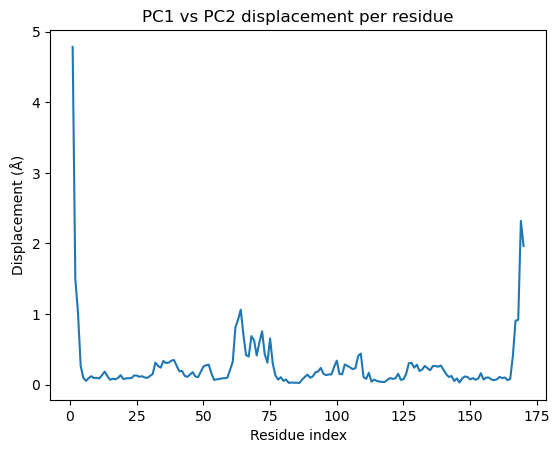

In [14]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# load your reference structure and PCA eigenvectors
u = mda.Universe("pc1_structures.pdb")
u2 = mda.Universe("pc2_structures.pdb")

# extract CA atoms
ca1 = u.select_atoms("name CA").positions
ca2 = u2.select_atoms("name CA").positions

# compute displacement per residue (Euclidean distance)
displacements = np.linalg.norm(ca2 - ca1, axis=1)

# plot
plt.plot(range(1, len(displacements)+1), displacements)
plt.xlabel("Residue index")
plt.ylabel("Displacement (Å)")
plt.title("PC1 vs PC2 displacement per residue")
plt.show()


In [160]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca'

In [161]:
cd ../../..

C:\Users\sakthi


In [117]:
cd 115

C:\Users\sakthi\hem\hem\pca\115


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2978507015.py:5: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2978507015.py:11: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)


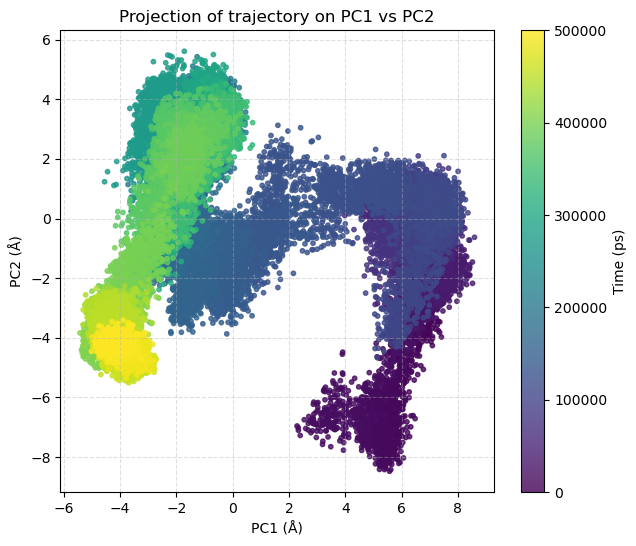

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
time = pc1[0].astype(float)     # first column = time
pc1_vals = pc1[1].astype(float) # second column = PC1

# Load PC2
pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float) # second column = PC2

# Scatter plot with color by time
plt.figure(figsize=(7,6))
scatter = plt.scatter(pc1_vals, pc2_vals, c=time, cmap='viridis', s=10, alpha=0.8)

plt.xlabel("PC1 (Å)")
plt.ylabel("PC2 (Å)")
plt.title("Projection of trajectory on PC1 vs PC2")

# Add colorbar for time
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ps)")

plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [295]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca\\5'

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\974229704.py:5: SyntaxWarning: invalid escape sequence '\s'
  pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\974229704.py:14: SyntaxWarning: invalid escape sequence '\s'
  pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)


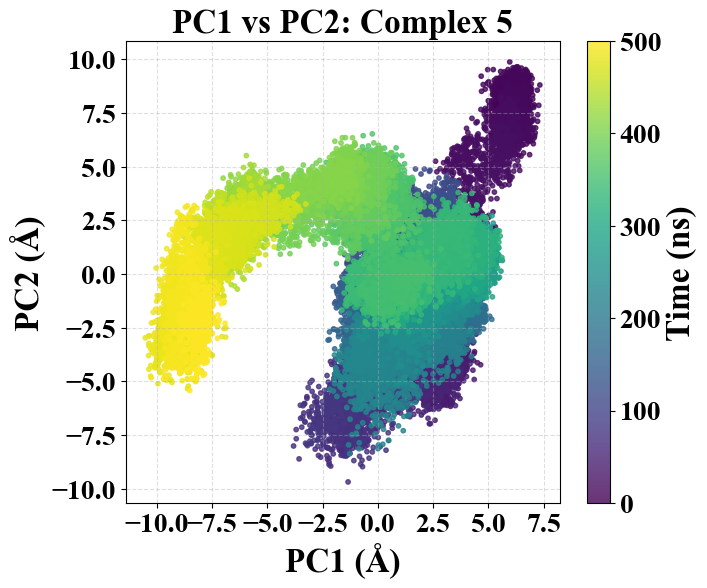

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
pca1 = pca1[~pca1[0].astype(str).str.startswith('#')]
time_ps = pca1[0].astype(float)     # time in picoseconds
pca1_vals = pca1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
pca2 = pca2[~pca2[0].astype(str).str.startswith('#')]
pca2_vals = pca2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pca1_vals, pca2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex 5", fontdict=label_font)


# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_5.png", dpi=300, bbox_inches='tight')

plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1186963367.py:5: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1186963367.py:14: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)


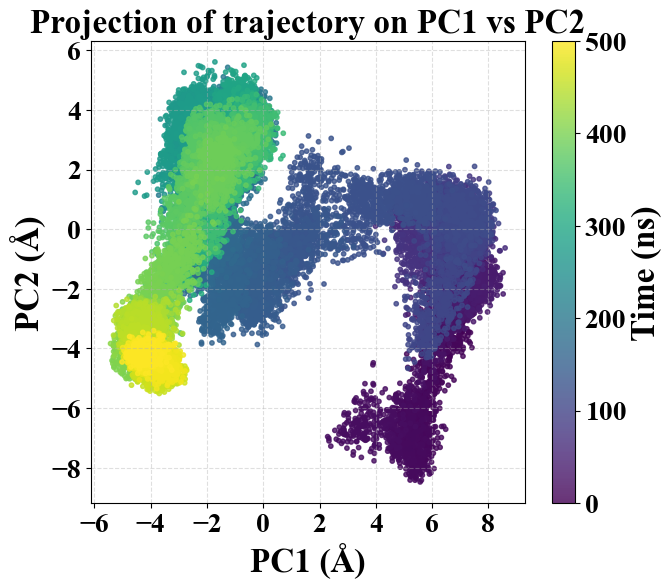

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
time_ps = pc1[0].astype(float)     # time in picoseconds
pc1_vals = pc1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pc1_vals, pc2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Projection of trajectory on PC1 vs PC2", fontdict=label_font)

# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_115.png", dpi=300, bbox_inches='tight')

plt.show()


In [172]:
pwd

'C:\\Users\\sakthi'

In [166]:
cd ../../../..

C:\Users\sakthi


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2276824626.py:6: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("891.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2276824626.py:15: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("892.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2276824626.py:20: SyntaxWarning: invalid escape sequence '\s'
  pc3 = pd.read_csv("893.xvg", sep='\s+', comment='@', header=None)


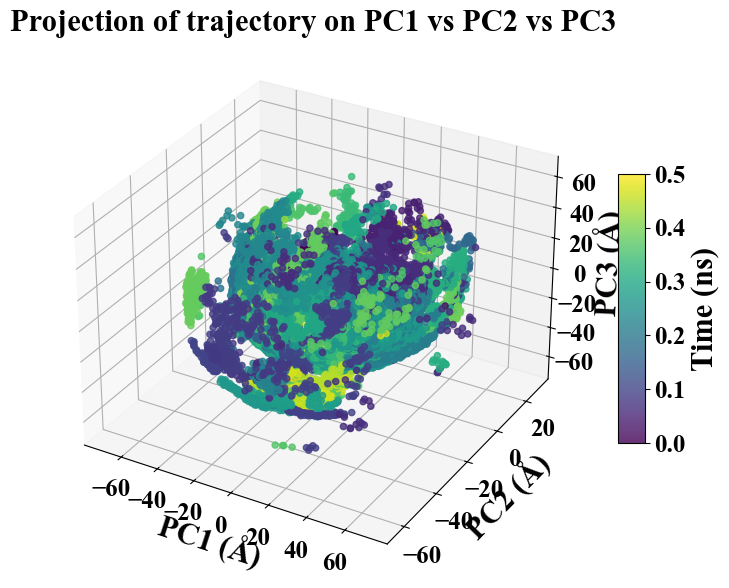

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Load PC1
pc1 = pd.read_csv("891.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
time_ps = pc1[0].astype(float)     # time in picoseconds
pc1_vals = pc1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pc2 = pd.read_csv("892.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float)    # PC2

# Load PC3
pc3 = pd.read_csv("893.xvg", sep='\s+', comment='@', header=None)
pc3 = pc3[~pc3[0].astype(str).str.startswith('#')]
pc3_vals = pc3[1].astype(float)    # PC3

# Create 3D scatter plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pc1_vals, pc2_vals, pc3_vals, c=time_ns, cmap='viridis', s=20, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 22}
tick_fontsize = 18

ax.set_xlabel("PC1 (Å)", fontdict=label_font)
ax.set_ylabel("PC2 (Å)", fontdict=label_font)
ax.set_zlabel("PC3 (Å)", fontdict=label_font)
ax.set_title("Projection of trajectory on PC1 vs PC2 vs PC3", fontdict=label_font)

# Set tick parameters for x, y, z axes
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    for label in axis.get_ticklabels():
        label.set_fontname('Times New Roman')
        label.set_fontsize(tick_fontsize)
        label.set_fontweight('bold')

# Add colorbar for time in nanoseconds
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.show()


In [174]:
cd ../89

C:\Users\sakthi\hem\hem\pca\89


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1186963367.py:5: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1186963367.py:14: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)


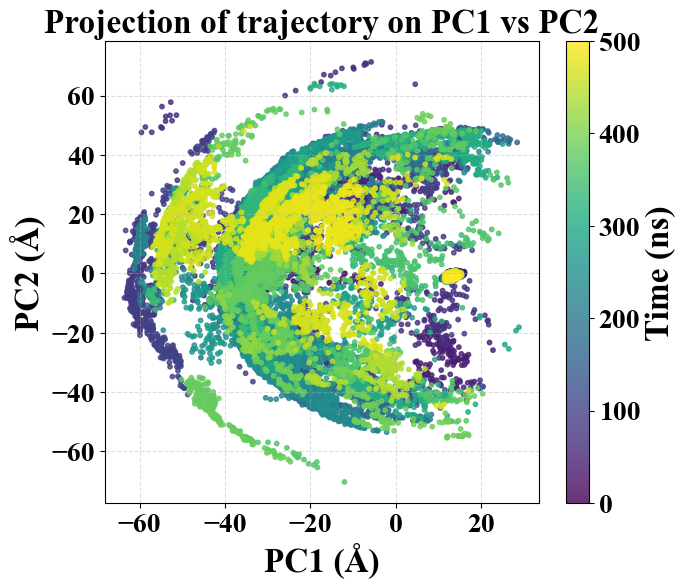

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
time_ps = pc1[0].astype(float)     # time in picoseconds
pc1_vals = pc1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pc1_vals, pc2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Projection of trajectory on PC1 vs PC2", fontdict=label_font)

# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_115.png", dpi=300, bbox_inches='tight')

plt.show()


<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1335513032.py:24: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


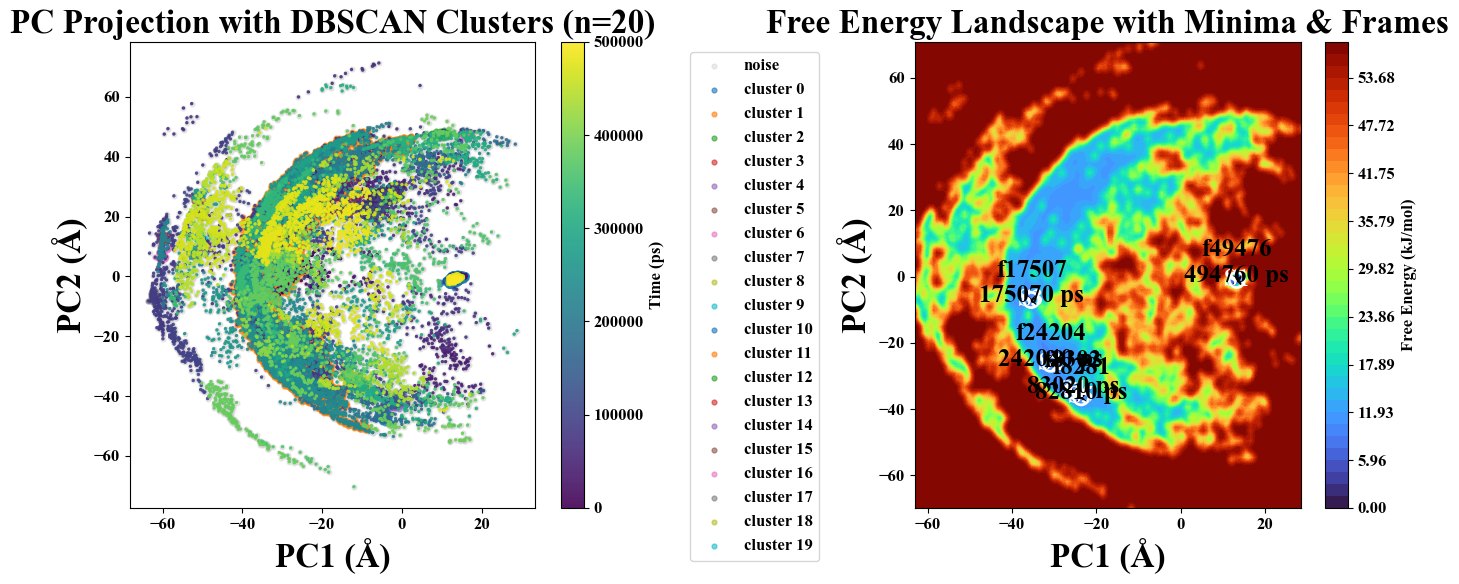


Representative states saved to representative_states.csv

  state        pc1        pc2  free_energy_kJ_mol  frame_index  time_ps  distance_in_PC_space
State_1  13.335106  -1.002747            0.000000        49476 494760.0              0.005320
State_2 -30.884362 -26.298197            9.715904        24204 242040.0              0.140131
State_3 -35.504307  -7.073655            9.847353        17507 175070.0              0.091723
State_4 -25.604426 -34.392741            9.996805         8302  83020.0              0.092700
State_5 -23.624450 -36.416377           10.099779         8281  82810.0              0.166108


In [185]:
# FEL_and_states.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree
import os

# ---- USER PARAMETERS ----
pc1_file = "pc1.xvg"
pc2_file = "pc2.xvg"
temperature = 300.0     # K
bins = 140              # histogram resolution (increase for more detail)
smooth_sigma = 1.0      # smoothing for FEL
min_prominence = 1.0    # local minima requirement (kJ/mol difference)
dbscan_eps = 1.5        # DBSCAN eps in PC units (Å) - adjust to your data
dbscan_min_samples = 30

# ---- read xvg helper (handles comments starting with @ or #) ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    # drop lines where first column starts with '#'
    df = df[~df[0].astype(str).str.startswith('#')]
    # If file has two columns: time, value -> return both
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        # If only one column present, return indices as time
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# load pc1, pc2
time1, pc1 = read_xvg_col(pc1_file)
time2, pc2 = read_xvg_col(pc2_file)

# sanity: lengths must match
if len(pc1) != len(pc2):
    raise ValueError("pc1 and pc2 lengths differ: {} vs {}".format(len(pc1), len(pc2)))

# Use time from first file (assume ps). Convert to ps if necessary.
time = time1.copy()

# ---- 2D histogram -> probability -> FEL ----
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=bins)
prob = H / np.sum(H)
# convert to free energy (kJ/mol)
R_kJ = 0.008314462618
RT = R_kJ * temperature
eps = 1e-12
F = -RT * np.log(prob + eps)
# smooth FEL
F_s = gaussian_filter(F, sigma=smooth_sigma)
# shift min to zero
F_s -= np.nanmin(F_s)

# ---- find local minima on FEL grid ----
# local minima where value equals minimum filter result and value is low
neighsize = 3
local_min = (F_s == minimum_filter(F_s, size=(neighsize, neighsize)))
# threshold minima by being within some small kJ/mol from local min - remove spurious
min_vals = F_s[local_min]
# set threshold relative to global min: allow minima up to e.g. 15 kJ/mol above global minimum
threshold = np.nanmin(F_s) + 15.0
candidate_mask = local_min & (F_s < threshold)
min_indices = np.array(np.where(candidate_mask)).T  # indices in grid space

# compute center coordinates for grid cells
xcenters = 0.5*(xedges[:-1] + xedges[1:])
ycenters = 0.5*(yedges[:-1] + yedges[1:])
# map minima grid indices to PC coords
min_coords = []
for idx in min_indices:
    i, j = idx
    px = xcenters[i]
    py = ycenters[j]
    val = F_s[i,j]
    min_coords.append((px, py, val))
# sort minima by free energy value (low -> high)
min_coords = sorted(min_coords, key=lambda x: x[2])

# Keep top N minima (say up to 5)
topN = min(5, len(min_coords))
min_coords = min_coords[:topN]

# ---- cluster the points (DBSCAN) to identify sampled clusters ----
pcs = np.vstack([pc1, pc2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_  # -1 = noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# ---- for each FEL minima, pick nearest real frame (Euclidean in PC space) ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my], k=1)
    frame_index = int(i)
    frame_time = float(time[frame_index])
    representative.append({
        "state": f"State_{idx+1}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": frame_index,
        "time_ps": frame_time,
        "distance_in_PC_space": float(d)
    })

# save representatives
rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)

# ---- PLOTTING ----
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(1,2, figsize=(14,6), gridspec_kw={'width_ratios':[1.05,1]})

# left: scatter with DBSCAN clusters, color by cluster label but preserve time color as edge
ax = axes[0]
unique_labels = sorted(set(labels))
# colormap for clusters (exclude noise)
cmap_clusters = plt.get_cmap("tab10")
for lab in unique_labels:
    mask = labels == lab
    if lab == -1:
        ax.scatter(pc1[mask], pc2[mask], s=12, c='lightgrey', alpha=0.45, label='noise')
    else:
        ax.scatter(pc1[mask], pc2[mask], s=12, c=np.asarray([cmap_clusters(lab % 10)]), alpha=0.6, label=f'cluster {lab}')


sc = ax.scatter(pc1, pc2, c=time, cmap='viridis', s=6, alpha=0.9, edgecolors='none')
ax.set_xlabel("PC1 (Å)", fontweight='bold', fontsize='24')
ax.set_ylabel("PC2 (Å)", fontweight='bold', fontsize='24')
ax.set_title(f"PC Projection with DBSCAN Clusters (n={n_clusters})", fontweight='bold', fontsize='24')

# Legend outside
ax.legend(bbox_to_anchor=(1.3, 1.05), loc='upper left', borderaxespad=2, frameon=True)
cb = fig.colorbar(sc, ax=ax)
cb.set_label("Time (ps)", fontweight='bold')




ax2 = axes[1]
X, Y = np.meshgrid(xcenters, ycenters)
levels = np.linspace(0, np.nanpercentile(F_s, 99), 40)
cf = ax2.contourf(X, Y, F_s.T, levels=levels, cmap='turbo')
cbar2 = fig.colorbar(cf, ax=ax2)
cbar2.set_label('Free Energy (kJ/mol)', fontweight='bold')

for i, (mx, my, mv) in enumerate(min_coords):
    ax2.scatter(mx, my, s=120, facecolors='none', edgecolors='white', linewidth=2)
    ax2.text(mx, my, f'S{i+1}', color='white', fontsize=18, weight='bold', ha='center', va='center')

for r in representative:
    ax2.scatter(r['pc1'], r['pc2'], s=40, c='black', marker='x')
    ax2.text(r['pc1'], r['pc2']-0.6, f"f{r['frame_index']}\n{int(r['time_ps'])} ps", color='black', fontsize=18, ha='center')

ax2.set_xlabel("PC1 (Å)", fontweight='bold', fontsize='24')
ax2.set_ylabel("PC2 (Å)", fontweight='bold', fontsize='24')
ax2.set_title("Free Energy Landscape with Minima & Frames", fontweight='bold', fontsize='24')

plt.tight_layout()
plt.savefig("FEL_and_clusters.png", dpi=300)
plt.show()

print("\nRepresentative states saved to representative_states.csv\n")
print(rep_df.to_string(index=False))

In [187]:
import pandas as pd
import numpy as np

# Load PC1 & PC2
pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
pc1_vals = pc1[1].astype(float)

pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float)

# Build DataFrame
df = pd.DataFrame({"pc1": pc1_vals, "pc2": pc2_vals})

# --- Build Free Energy Landscape (Boltzmann Inversion on 2D histogram) ---
kB = 0.008314  # kJ/mol·K
T = 300  # modify if your simulation temperature is different

# 2D histogram
H, xedges, yedges = np.histogram2d(df["pc1"], df["pc2"], bins=100)

# Convert to free energy (avoid log(0) by replacing 0 with nan)
P = H / np.sum(H)
P[P == 0] = np.nan
F = -kB * T * np.log(P)
F = F - np.nanmin(F)  # set minimum to 0

# Expand histogram into dataframe format
fel_data = []
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        fel_data.append([ (xedges[i]+xedges[i+1])/2,
                          (yedges[j]+yedges[j+1])/2,
                          F[i][j] ])

fel_df = pd.DataFrame(fel_data, columns=["pc1", "pc2", "free_energy"])

# Save to CSV
fel_df.to_csv("FEL_data.csv", index=False)

print("✅ FEL_data.csv generated with", len(fel_df), "points.")


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2741665132.py:5: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2741665132.py:9: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)


✅ FEL_data.csv generated with 10000 points.


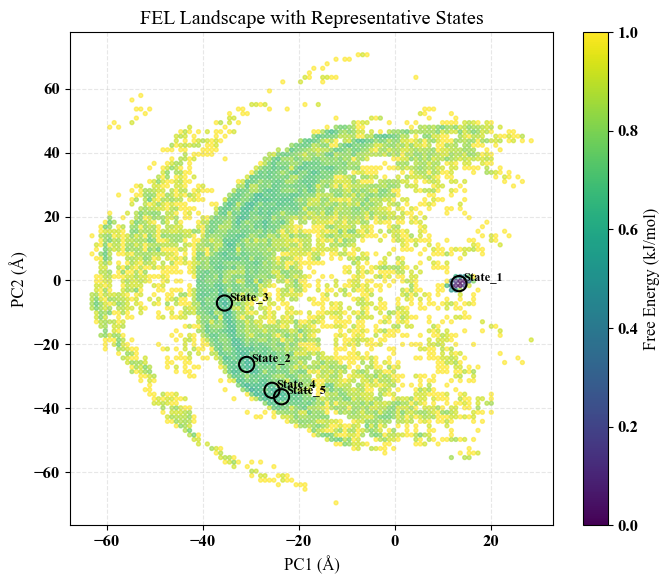

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load FEL data used earlier
data = pd.read_csv("FEL_data.csv")  # assuming columns: pc1, pc2, free_energy

# Load representative state CSV
states = pd.read_csv("representative_states.csv")

plt.figure(figsize=(7, 6))

# Plot FEL scatter
plt.scatter(data['pc1'], data['pc2'], c=data['free_energy'], cmap='viridis', s=8, alpha=0.6)

# Highlight representative states
plt.scatter(states['pc1'], states['pc2'], s=120, edgecolors='black', facecolors='none', linewidth=1.5)

# Annotate states
for index, row in states.iterrows():
    plt.text(row['pc1'] + 1, row['pc2'] + 1, row['state'], fontsize=9, fontweight='bold')

# Labels and aesthetics
plt.xlabel("PC1 (Å)")
plt.ylabel("PC2 (Å)")
plt.title("FEL Landscape with Representative States")
cbar = plt.colorbar()
cbar.set_label("Free Energy (kJ/mol)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


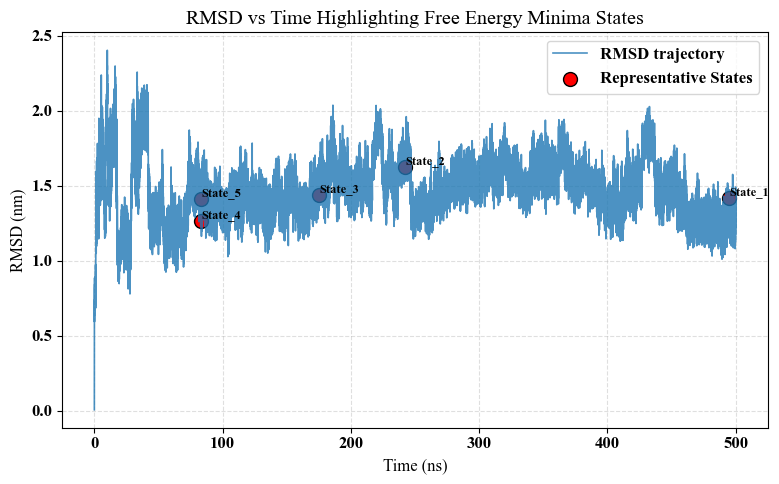

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Load RMSD file that contains headers "Time_ns" and "RMSD"
rmsd = pd.read_csv("89.csv", sep=',')  # Adjust if separator differs

# Extract time and RMSD
time = rmsd['Time_ns'].astype(float)
rmsd_vals = rmsd['RMSD'].astype(float)

# Load representative state data
states = pd.read_csv("representative_states.csv")

# Plot RMSD
plt.figure(figsize=(8, 5))
plt.plot(time, rmsd_vals, linewidth=1.2, alpha=0.8, label="RMSD trajectory")

# Highlight representative states
plt.scatter(states['time_ps'] / 1000,  # converting ps → ns
            rmsd_vals.iloc[states['frame_index'].astype(int)],
            s=100, edgecolors='black', facecolors='red', label='Representative States')

# Annotate states
for i, row in states.iterrows():
    plt.text((row['time_ps']/1000) + 0.5,  # offset label
             rmsd_vals.iloc[int(row['frame_index'])] + 0.02,
             row['state'], fontsize=9, fontweight='bold')

# Labels & Formatting
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.title("RMSD vs Time Highlighting Free Energy Minima States")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [302]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca\\5'

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\591031881.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


✅ Saved representative_states.csv
      state       pc1       pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01  4.335441  0.728577            0.000000        27116  271160.0   
1  State_02  4.207899  0.449265            0.057124        24960  249600.0   
2  State_03  0.636721 -0.528327            0.400045        31194  311940.0   
3  State_04  0.254095 -3.461101            0.510834        19271  192710.0   
4  State_05  0.764263 -3.600757            0.937973        20657  206570.0   

   distance_in_PC_space  
0              0.010944  
1              0.006124  
2              0.010953  
3              0.016046  
4              0.007546  


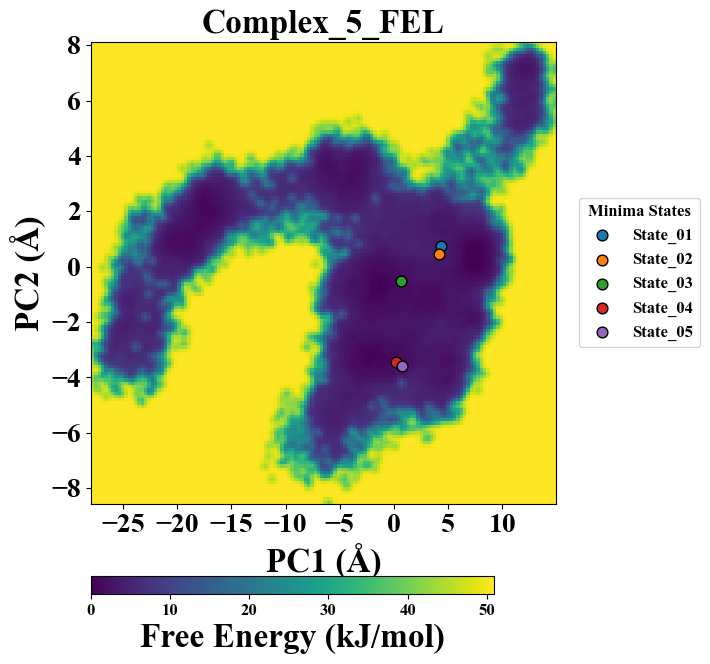

In [301]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pc1_file = "pca1.xvg"       # PC1 file for the complex
pc2_file = "pca2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pc1 = read_xvg_col(pc1_file)
time2, pc2 = read_xvg_col(pc2_file)
if len(pc1) != len(pc2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pc1, pc2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto')

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_5_FEL", fontdict=label_font)


# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)
plt.savefig("fel_5.png", dpi=300, bbox_inches='tight')
plt.show()


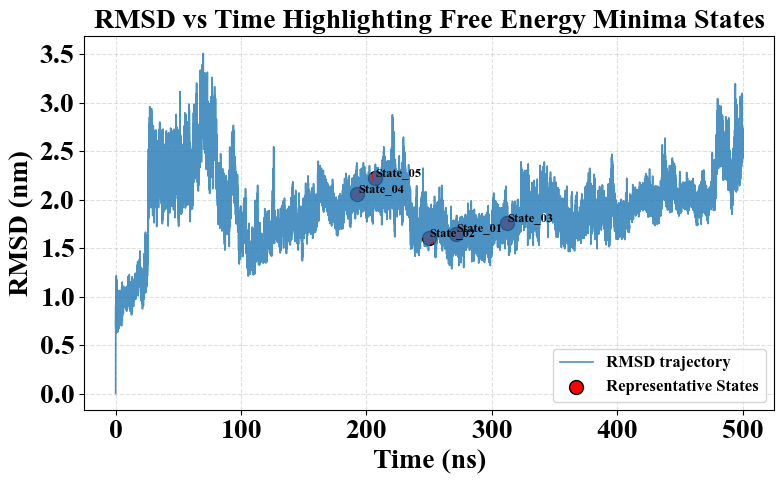

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Load RMSD file that contains headers "Time_ns" and "RMSD"
rmsd = pd.read_csv("5.csv", sep=',')  # Adjust if separator differs

# Extract time and RMSD
time = rmsd['Time_ns'].astype(float)
rmsd_vals = rmsd['RMSD'].astype(float)

# Load representative state data
states = pd.read_csv("representative_states.csv")

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

# Plot RMSD
plt.figure(figsize=(8, 5))
plt.plot(time, rmsd_vals, linewidth=1.2, alpha=0.8, label="RMSD trajectory")

# Highlight representative states
plt.scatter(states['time_ps'] / 1000,  # converting ps → ns
            rmsd_vals.iloc[states['frame_index'].astype(int)],
            s=100, edgecolors='black', facecolors='red', label='Representative States')

# Annotate states
for i, row in states.iterrows():
    plt.text((row['time_ps']/1000) + 0.5,  # offset label
             rmsd_vals.iloc[int(row['frame_index'])] + 0.02,
             row['state'], fontsize=9, fontweight='bold')

# Labels & Formatting
plt.xlabel("Time (ns)", fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.ylabel("RMSD (Å)", fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.title("RMSD vs Time Highlighting Free Energy Minima States", fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [229]:
pwd

'C:\\Users\\sakthi\\hem\\hem\\pca\\5'

In [298]:
cd ../41

C:\Users\sakthi\hem\hem\pca\41


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1420536884.py:5: SyntaxWarning: invalid escape sequence '\s'
  pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\1420536884.py:14: SyntaxWarning: invalid escape sequence '\s'
  pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)


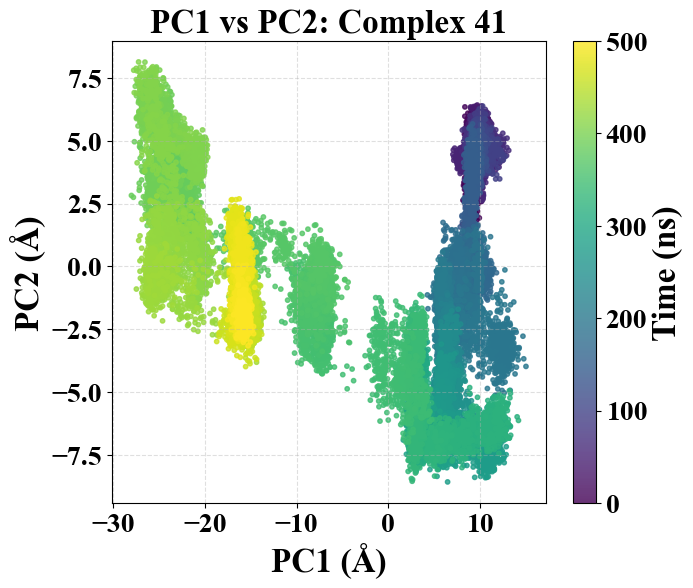

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
pca1 = pca1[~pca1[0].astype(str).str.startswith('#')]
time_ps = pca1[0].astype(float)     # time in picoseconds
pca1_vals = pca1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
pca2 = pca2[~pca2[0].astype(str).str.startswith('#')]
pca2_vals = pca2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pca1_vals, pca2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex 41", fontdict=label_font)


# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_41.png", dpi=300, bbox_inches='tight')

plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2148353978.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


✅ Saved representative_states.csv
      state        pc1       pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01   9.613009  4.730520            0.000000        10393  103930.0   
1  State_02 -15.260847 -1.945760            2.705395        44021  440210.0   
2  State_03   5.927993 -4.568584            2.709744        23404  234040.0   
3  State_04   8.998839 -0.276690            3.753235        16348  163480.0   
4  State_05   3.164231 -6.833750            4.147660        32816  328160.0   

   distance_in_PC_space  
0              0.003473  
1              0.012356  
2              0.010857  
3              0.002310  
4              0.016304  


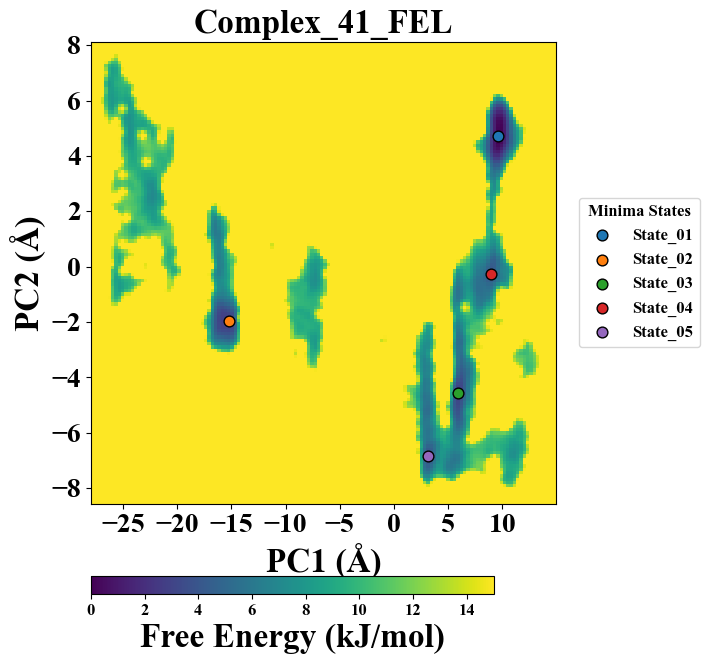

In [299]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pca1_file = "pca1.xvg"       # PC1 file for the complex
pca2_file = "pca2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pca1 = read_xvg_col(pca1_file)
time2, pca2 = read_xvg_col(pca2_file)
if len(pca1) != len(pca2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pca1, pca2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pca1, pca2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

vmin = 0      # or np.nanmin(F_s)
vmax = 15     # or another upper limit depending on your data


# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_41_FEL", fontdict=label_font)



# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)

plt.savefig("fel_41.png", dpi=300, bbox_inches='tight')

plt.show()



In [308]:
cd ../64

C:\Users\sakthi\hem\hem\pca\64


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\3525747482.py:5: SyntaxWarning: invalid escape sequence '\s'
  pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\3525747482.py:14: SyntaxWarning: invalid escape sequence '\s'
  pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)


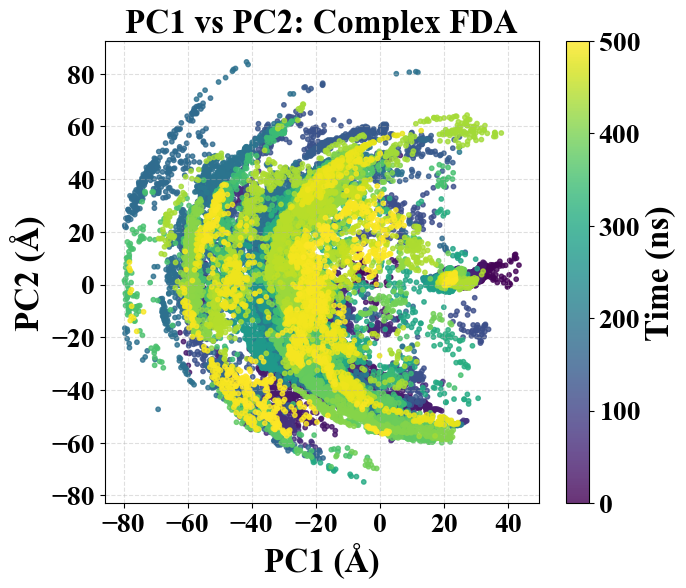

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
pca1 = pca1[~pca1[0].astype(str).str.startswith('#')]
time_ps = pca1[0].astype(float)     # time in picoseconds
pca1_vals = pca1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
pca2 = pca2[~pca2[0].astype(str).str.startswith('#')]
pca2_vals = pca2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pca1_vals, pca2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex FDA", fontdict=label_font)


# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_64.png", dpi=300, bbox_inches='tight')

plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\98863473.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


✅ Saved representative_states.csv
      state        pc1        pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01  20.969474   1.956562            0.000000        11166  111660.0   
1  State_02  28.884203   3.094949            5.117253         4188   41880.0   
2  State_03 -23.880658  32.693015            9.074436        42093  420930.0   
3  State_04 -28.277730  -6.012148            9.359277        42629  426290.0   
4  State_05 -18.604172  39.523338            9.593150        47916  479160.0   

   distance_in_PC_space  
0              0.002697  
1              0.010316  
2              0.098705  
3              0.075480  
4              0.150752  


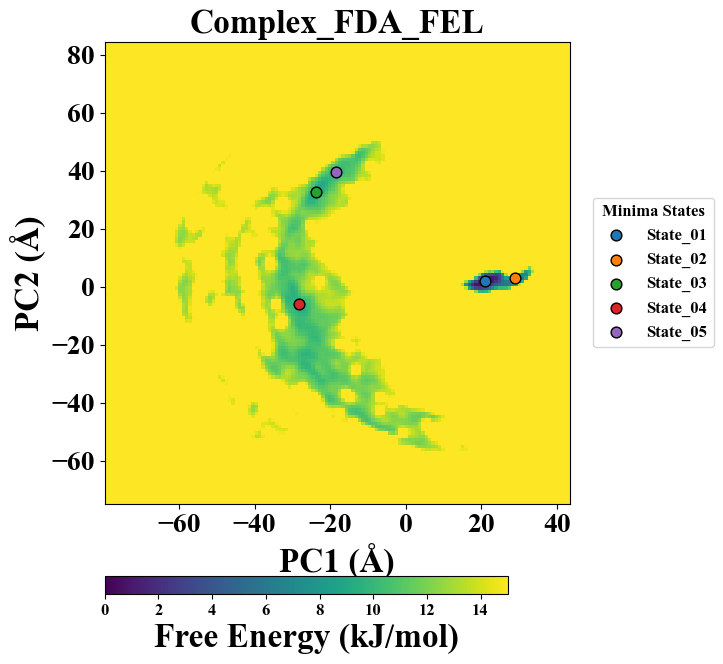

In [311]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pca1_file = "pca1.xvg"       # PC1 file for the complex
pca2_file = "pca2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pca1 = read_xvg_col(pca1_file)
time2, pca2 = read_xvg_col(pca2_file)
if len(pca1) != len(pca2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pca1, pca2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pca1, pca2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

vmin = 0      # or np.nanmin(F_s)
vmax = 15     # or another upper limit depending on your data


# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_FDA_FEL", fontdict=label_font)



# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)

plt.savefig("fel_64.png", dpi=300, bbox_inches='tight')

plt.show()



In [266]:
cd ../89

C:\Users\sakthi\hem\hem\pca\89


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:75: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:75: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\541821986.py:5: SyntaxWarning: invalid escape sequence '\s'
  pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\541821986.py:14: SyntaxWarning: invalid escape sequence '\s'
  pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\541821986.py:75: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


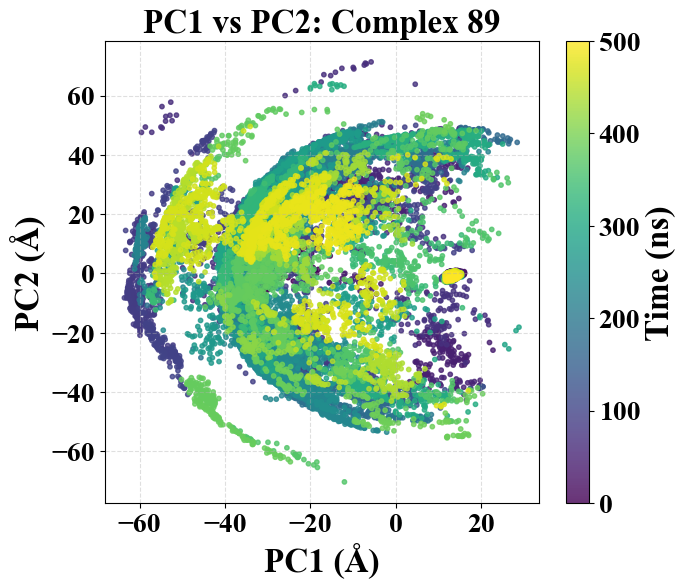

✅ Saved representative_states.csv
      state        pc1        pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01  13.335106  -1.002747            0.000000        49476  494760.0   
1  State_02 -30.884362 -26.298197            9.715904        24204  242040.0   
2  State_03 -35.504307  -7.073655            9.847353        17507  175070.0   
3  State_04 -25.604426 -34.392741            9.996805         8302   83020.0   
4  State_05 -23.624450 -36.416377           10.099779         8281   82810.0   

   distance_in_PC_space  
0              0.005320  
1              0.140131  
2              0.091723  
3              0.092700  
4              0.166108  


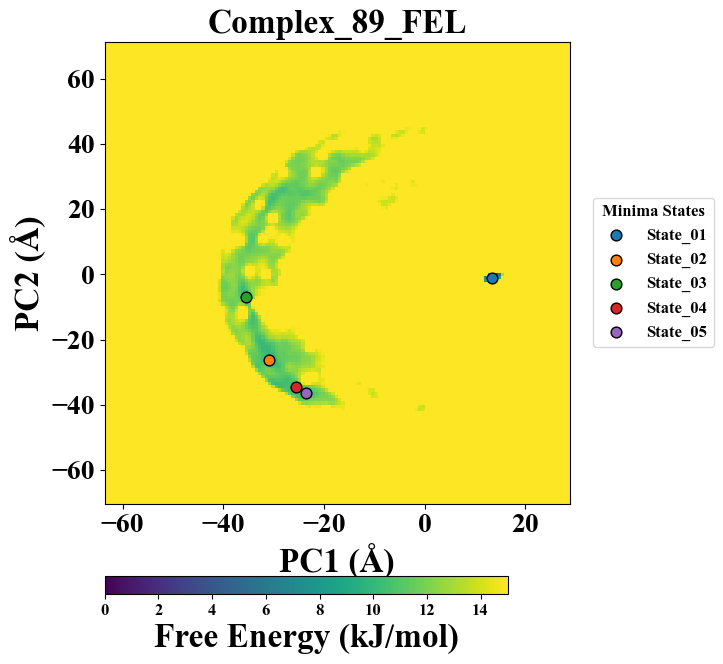

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
pca1 = pca1[~pca1[0].astype(str).str.startswith('#')]
time_ps = pca1[0].astype(float)     # time in picoseconds
pca1_vals = pca1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
pca2 = pca2[~pca2[0].astype(str).str.startswith('#')]
pca2_vals = pca2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pca1_vals, pca2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex 89", fontdict=label_font)


# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_89.png", dpi=300, bbox_inches='tight')

plt.show()



import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pca1_file = "pca1.xvg"       # PC1 file for the complex
pca2_file = "pca2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pca1 = read_xvg_col(pca1_file)
time2, pca2 = read_xvg_col(pca2_file)
if len(pca1) != len(pca2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pca1, pca2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pca1, pca2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

vmin = 0      # or np.nanmin(F_s)
vmax = 15     # or another upper limit depending on your data


# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_89_FEL", fontdict=label_font)



# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)

plt.savefig("fel_89.png", dpi=300, bbox_inches='tight')

plt.show()




In [277]:
cd ..


C:\Users\sakthi\hem\hem\pca


In [289]:
import os
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pca_root = r"C:\Users\sakthi\hem\hem\pca"  # root folder containing all complex folders
complexes = ["5", "41", "64", "89", "114", "115"]
temperature = 300.0        # K
bins = 140
smooth_sigma = 1.0
dbscan_eps = 1.5
dbscan_min_samples = 30
topN_minima = 5

R_kJ = 0.008314462618  # kJ/mol·K

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    df = pd.read_csv(fname, comment='@', header=None, sep=r'\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Loop through complexes ----
summary = []

for cpx in complexes:
    folder = os.path.join(pca_root, cpx)
    pc1_file = os.path.join(folder, f"{cpx}pca1.xvg")
    pc2_file = os.path.join(folder, f"{cpx}pca2.xvg")

    # Load PCA data
    time, pc1 = read_xvg_col(pc1_file)
    _, pc2 = read_xvg_col(pc2_file)

    # 2D Histogram → FEL (absolute FE)
    H, xedges, yedges = np.histogram2d(pc1, pc2, bins=bins)
    prob = H / np.sum(H)
    F = -R_kJ * temperature * np.log(prob + 1e-12)
    F_s = gaussian_filter(F, sigma=smooth_sigma)  # absolute free energy

    # Find local minima
    local_min = (F_s == minimum_filter(F_s, size=(3,3)))
    candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
    min_indices = np.array(np.where(candidate_mask)).T

    xcenters = 0.5*(xedges[:-1]+xedges[1:])
    ycenters = 0.5*(yedges[:-1]+yedges[1:])
    min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
    min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

    # DBSCAN clustering
    pcs = np.vstack([pc1, pc2]).T
    db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
    labels = db.labels_

    # Representative states
    tree = cKDTree(pcs)
    representative = []
    for idx, (mx, my, mv) in enumerate(min_coords):
        d, i = tree.query([mx, my])
        representative.append({
            "state": f"State_{idx+1:02d}",
            "pc1": mx,
            "pc2": my,
            "free_energy_kJ_mol": float(mv),
            "frame_index": int(i),
            "time_ps": float(time[int(i)]),
            "distance_in_PC_space": float(d)
        })

    rep_df = pd.DataFrame(representative)
    rep_df.to_csv(os.path.join(folder, f"{cpx}_representative_states_absoluteFE.csv"), index=False)

    # Save the lowest free energy for comparison
    min_FE = rep_df['free_energy_kJ_mol'].min()
    min_state = rep_df.loc[rep_df['free_energy_kJ_mol'].idxmin(), 'state']
    summary.append({"complex": cpx, "min_FE": min_FE, "state": min_state})

# ---- Summary table of global minima across complexes ----
summary_df = pd.DataFrame(summary).sort_values("min_FE")
summary_df.to_csv(os.path.join(pca_root, "global_minima_comparison.csv"), index=False)
print(summary_df)


  complex     min_FE     state
3      89  10.765484  State_01
2      64  10.914595  State_01
4     114  11.050481  State_01
1      41  13.753066  State_01
5     115  16.868395  State_01
0       5  18.043696  State_01


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2553814424.py:5: SyntaxWarning: invalid escape sequence '\s'
  pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2553814424.py:14: SyntaxWarning: invalid escape sequence '\s'
  pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)


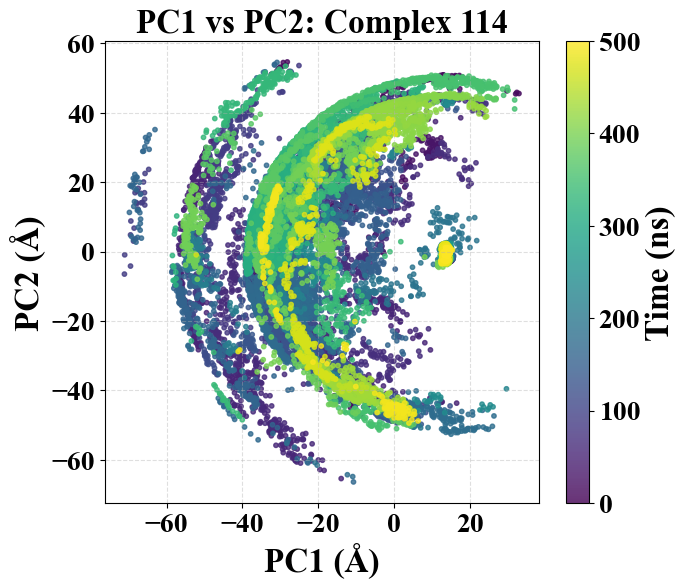

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pca1 = pd.read_csv("pca1.xvg", sep='\s+', comment='@', header=None)
pca1 = pca1[~pca1[0].astype(str).str.startswith('#')]
time_ps = pca1[0].astype(float)     # time in picoseconds
pca1_vals = pca1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pca2 = pd.read_csv("pca2.xvg", sep='\s+', comment='@', header=None)
pca2 = pca2[~pca2[0].astype(str).str.startswith('#')]
pca2_vals = pca2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pca1_vals, pca2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex 114", fontdict=label_font)


# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_114.png", dpi=300, bbox_inches='tight')

plt.show()





<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\3015466876.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


✅ Saved representative_states.csv
      state        pc1        pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01  14.019226  -1.984321            0.000000        48047  480470.0   
1  State_02 -32.094195   5.791866            8.734766        15555  155550.0   
2  State_03 -31.350430 -13.216592            8.741542        10095  100950.0   
3  State_04 -29.862900 -17.536696            8.974467        18313  183130.0   
4  State_05 -21.681487 -31.361028            9.057100        16178  161780.0   

   distance_in_PC_space  
0              0.004731  
1              0.106697  
2              0.178532  
3              0.057421  
4              0.162258  


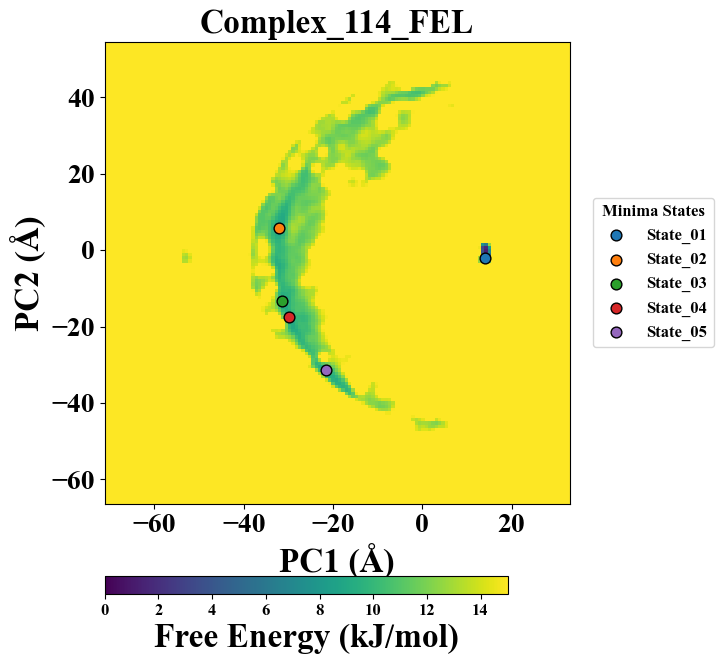

In [269]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pca1_file = "pca1.xvg"       # PC1 file for the complex
pca2_file = "pca2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pca1 = read_xvg_col(pca1_file)
time2, pca2 = read_xvg_col(pca2_file)
if len(pca1) != len(pca2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pca1, pca2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pca1, pca2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

vmin = 0      # or np.nanmin(F_s)
vmax = 15     # or another upper limit depending on your data


# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_114_FEL", fontdict=label_font)



# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)

plt.savefig("fel_114.png", dpi=300, bbox_inches='tight')

plt.show()




In [271]:
cd ../115

C:\Users\sakthi\hem\hem\pca\115


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\517551155.py:5: SyntaxWarning: invalid escape sequence '\s'
  pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\517551155.py:14: SyntaxWarning: invalid escape sequence '\s'
  pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)


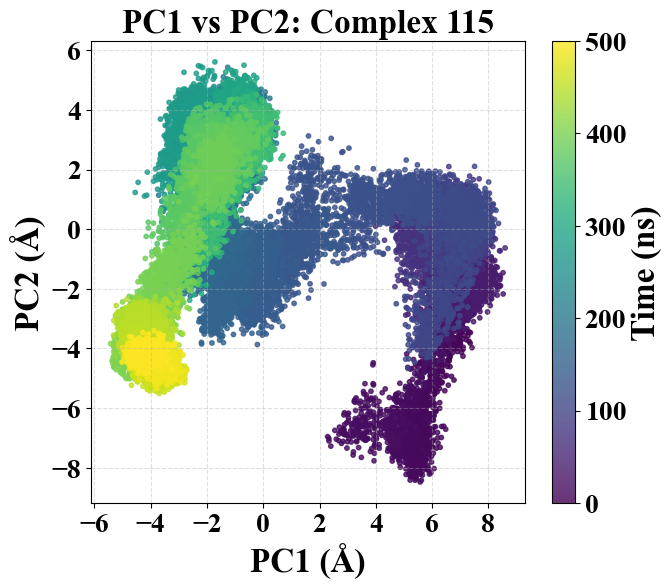

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PC1
pc1 = pd.read_csv("pc1.xvg", sep='\s+', comment='@', header=None)
pc1 = pc1[~pc1[0].astype(str).str.startswith('#')]
time_ps = pc1[0].astype(float)     # time in picoseconds
pc1_vals = pc1[1].astype(float)    # PC1

# Convert time to nanoseconds
time_ns = time_ps / 1000.0

# Load PC2
pc2 = pd.read_csv("pc2.xvg", sep='\s+', comment='@', header=None)
pc2 = pc2[~pc2[0].astype(str).str.startswith('#')]
pc2_vals = pc2[1].astype(float)    # PC2

# Scatter plot with color by time (in ns)
plt.figure(figsize=(7,6))
scatter = plt.scatter(pc1_vals, pc2_vals, c=time_ns, cmap='viridis', s=10, alpha=0.8)

# Font properties for labels and title
label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("PC1 vs PC2: Complex 115", fontdict=label_font)

# Set ticks font properties for x and y axes
plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

# Add colorbar for time in nanoseconds
cbar = plt.colorbar(scatter)
cbar.set_label("Time (ns)", fontdict=label_font)
cbar.ax.tick_params(labelsize=tick_fontsize)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(tick_fontsize)
    tick.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.4)

# Save plot as PNG
plt.savefig("pca_115.png", dpi=300, bbox_inches='tight')

plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sakthi\AppData\Local\Temp\ipykernel_15672\2626450156.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')


✅ Saved representative_states.csv
      state       pc1       pc2  free_energy_kJ_mol  frame_index   time_ps  \
0  State_01 -3.976312 -4.399977            0.000000        40084  400840.0   
1  State_02 -4.376946 -3.494698            0.151682        41018  410180.0   
2  State_03 -0.671081  3.345184            0.182310        20133  201330.0   
3  State_04 -2.073300  3.546357            0.471176        22916  229160.0   
4  State_05 -1.472349  3.546357            0.990822        27656  276560.0   

   distance_in_PC_space  
0              0.011138  
1              0.001737  
2              0.003828  
3              0.006437  
4              0.006197  


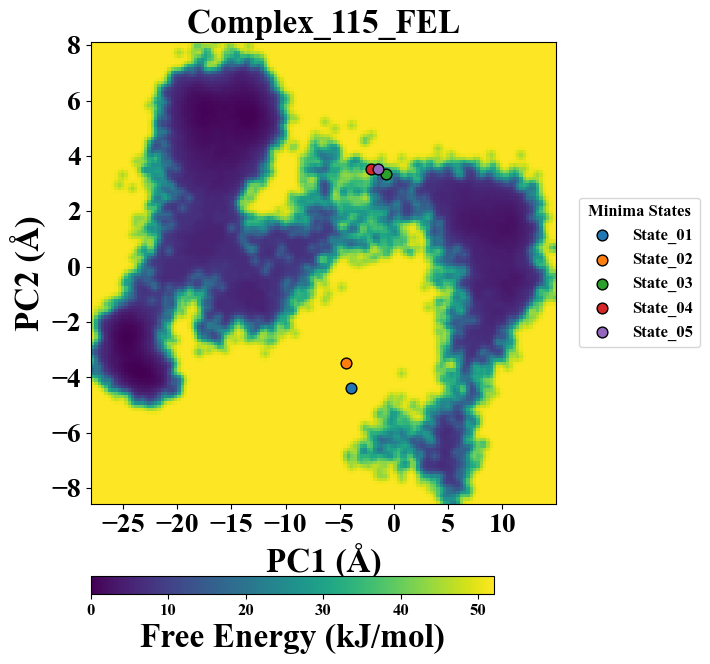

In [307]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree

# ---- User Parameters ----
pc1_file = "pc1.xvg"       # PC1 file for the complex
pc2_file = "pc2.xvg"       # PC2 file for the complex
temperature = 300.0        # simulation temperature in K
bins = 140                 # histogram resolution
smooth_sigma = 1.0         # smoothing for FEL
dbscan_eps = 1.5           # DBSCAN eps in Å
dbscan_min_samples = 30    # min points for DBSCAN
topN_minima = 5            # number of FEL minima to pick

# ---- Helper function to read xvg ----
def read_xvg_col(fname):
    if not os.path.exists(fname):
        raise FileNotFoundError(fname)
    df = pd.read_csv(fname, comment='@', header=None, sep='\s+', engine='python')
    df = df[~df[0].astype(str).str.startswith('#')]
    if df.shape[1] >= 2:
        return df.iloc[:,0].astype(float).values, df.iloc[:,1].astype(float).values
    else:
        return np.arange(len(df)), df.iloc[:,0].astype(float).values

# ---- Load PC1 & PC2 ----
time1, pc1 = read_xvg_col(pc1_file)
time2, pc2 = read_xvg_col(pc2_file)
if len(pc1) != len(pc2):
    raise ValueError("PC1 and PC2 lengths differ!")

time = time1.copy()

# ---- 2D Histogram → FEL ----
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=bins)
prob = H / np.sum(H)
R_kJ = 0.008314462618
RT = R_kJ * temperature
F = -RT * np.log(prob + 1e-12)
F_s = gaussian_filter(F, sigma=smooth_sigma)
F_s -= np.nanmin(F_s)

# ---- Find local minima ----
local_min = (F_s == minimum_filter(F_s, size=(3,3)))
candidate_mask = local_min & (F_s < np.nanmin(F_s)+15.0)
min_indices = np.array(np.where(candidate_mask)).T

xcenters = 0.5*(xedges[:-1]+xedges[1:])
ycenters = 0.5*(yedges[:-1]+yedges[1:])
min_coords = [(xcenters[i], ycenters[j], F_s[i,j]) for i,j in min_indices]
min_coords = sorted(min_coords, key=lambda x: x[2])[:topN_minima]

# ---- DBSCAN Clustering ----
pcs = np.vstack([pc1, pc2]).T
db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(pcs)
labels = db.labels_

# ---- Representative states ----
tree = cKDTree(pcs)
representative = []
for idx, (mx, my, mv) in enumerate(min_coords):
    d, i = tree.query([mx, my])
    representative.append({
        "state": f"State_{idx+1:02d}",
        "pc1": mx,
        "pc2": my,
        "free_energy_kJ_mol": float(mv),
        "frame_index": int(i),
        "time_ps": float(time[int(i)]),
        "distance_in_PC_space": float(d)
    })

rep_df = pd.DataFrame(representative)
rep_df.to_csv("representative_states.csv", index=False)
print("✅ Saved representative_states.csv")
print(rep_df)

fig, ax = plt.subplots(figsize=(8,6))

label_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 24}
tick_fontsize = 20

# Plot FEL heatmap with viridis colormap
im = ax.imshow(F_s.T, origin='lower', extent=extent, cmap='viridis', aspect='auto')

# Plot minima points
colors = plt.cm.tab10.colors
for idx, (mx, my, mv) in enumerate(min_coords):
    ax.scatter(mx, my, color=colors[idx % 10], s=60, label=f"State_{idx+1:02d}", edgecolors='k')

plt.xticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')
plt.yticks(fontname='Times New Roman', fontsize=tick_fontsize, fontweight='bold')

plt.xlabel("PC1 (Å)", fontdict=label_font)
plt.ylabel("PC2 (Å)", fontdict=label_font)
plt.title("Complex_115_FEL", fontdict=label_font)


# Shrink plot to make room for legend on right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Add colorbar below the plot
cbar_ax = fig.add_axes([box.x0, box.y0 - 0.15, box.width * 0.65, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Free Energy (kJ/mol)', fontdict=label_font)

# Add legend on the right side (outside plot)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Minima States", borderaxespad=0.)
plt.savefig("fel_115.png", dpi=300, bbox_inches='tight')

plt.show()


In [10]:
pwd


'C:\\Users\\sakthi\\hem\\hem'

In [29]:
cd ../5

C:\Users\sakthi\hem\hem\h-b\5


In [30]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")
#5

[0.013901078232199498, 3.0947644445352496, 17.43625954131]
Hydrogen-bond residence time (τ_int): 6.848 ± 7.592 ns


In [41]:
cd ../41

C:\Users\sakthi\hem\hem\h-b\41


In [42]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")
#64

[32.70011736207601, 0.009908395819753007, 0.00030814132763000207]
Hydrogen-bond residence time (τ_int): 10.903 ± 15.413 ns


In [33]:
cd ../64

C:\Users\sakthi\hem\hem\h-b\64


In [34]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")

[0.0015079537494691003, 3.3449391206666528, 0.0216630183540465]
Hydrogen-bond residence time (τ_int): 1.123 ± 1.571 ns


In [35]:
cd ../89

C:\Users\sakthi\hem\hem\h-b\89


In [36]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")

[5.538250216782201, 0.009383053160972597, 0.0073762139765008]
Hydrogen-bond residence time (τ_int): 1.852 ± 2.607 ns


In [37]:
cd ../114

C:\Users\sakthi\hem\hem\h-b\114


In [38]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")

[0.0018015870910569997, 0.01446972018022145, 7.96261968866734]
Hydrogen-bond residence time (τ_int): 2.660 ± 3.750 ns


In [39]:
cd ../115

C:\Users\sakthi\hem\hem\h-b\115


In [40]:
import numpy as np
import glob

# === Read all triplicate autocorrelation files ===
files = ['1hbac.xvg', '2hbac.xvg', '3hbac.xvg']  # change names as needed
tau_ns = []

for f in files:
    data = np.loadtxt(f, comments=['@', '#'])
    t = data[:, 0]   # time (ps)
    C = data[:, 1]   # autocorrelation function

    # Integrate C(t) over time using trapezoidal rule
    tau_ps = np.trapz(C, t)          # gives τ in ps
    tau_ns.append(tau_ps / 1000.0)   # convert to ns

print(tau_ns)

# === Compute average and standard deviation ===
tau_mean = np.mean(tau_ns)
tau_std = np.std(tau_ns)

print(f"Hydrogen-bond residence time (τ_int): {tau_mean:.3f} ± {tau_std:.3f} ns")

[0.009212605229263699, 0.0064154067848983, 23.7681906528742]
Hydrogen-bond residence time (τ_int): 7.928 ± 11.201 ns


In [9]:
pwd

'C:\\Users\\sakthi'

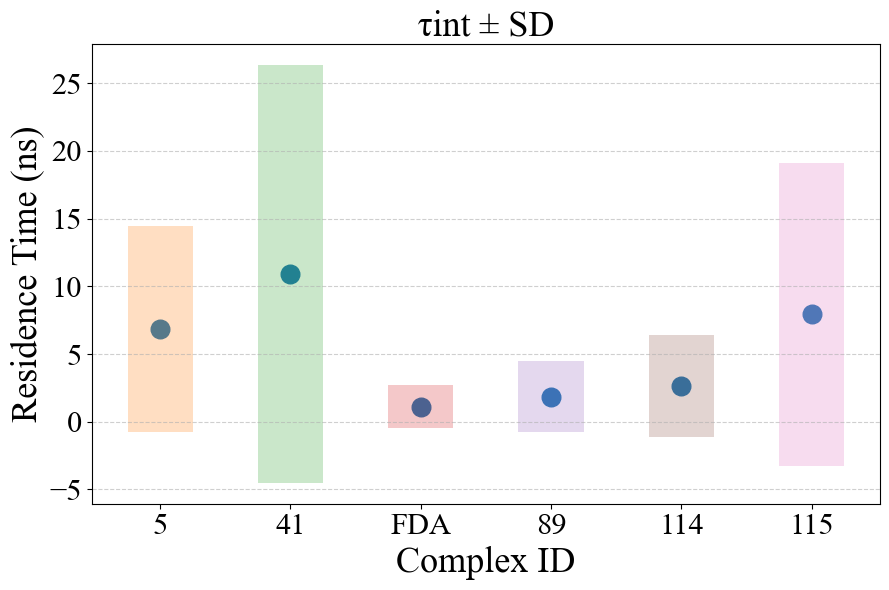

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
complexes = np.array(["5", "41", "FDA", "89", "114", "115"])
res_time = np.array([6.848, 10.903, 1.123, 1.852, 2.660, 7.928])
sd = np.array([7.592, 15.413, 1.571, 2.607, 3.750, 11.201])

x = np.arange(len(complexes))

plt.figure(figsize=(9, 6))

# Scatter points
plt.scatter(x, res_time, s=180, marker='o')

# SD shaded region (vertical per point)
for i in range(len(x)):
    plt.fill_between([x[i]-0.25, x[i]+0.25],
                     res_time[i] - sd[i],
                     res_time[i] + sd[i],
                     alpha=0.25)

# Styling
plt.xticks(x, complexes, fontsize=22, fontname='Times New Roman')
plt.yticks(fontsize=22, fontname='Times New Roman')
plt.xlabel("Complex ID", fontsize=26, fontname='Times New Roman')
plt.ylabel("Residence Time (ns)", fontsize=26, fontname='Times New Roman')
plt.title("τint ± SD", fontsize=26, fontname='Times New Roman')

plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.show()


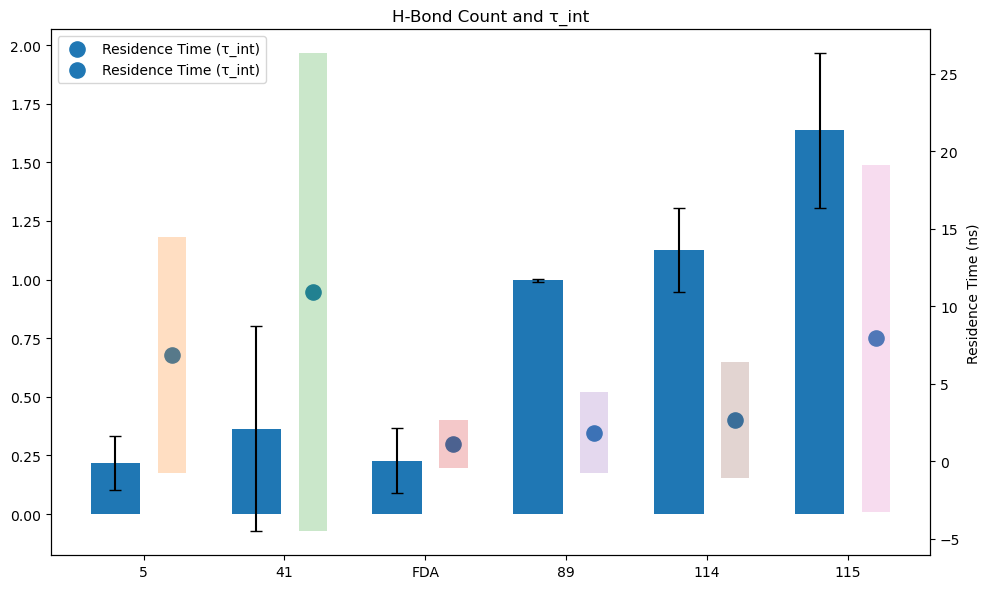

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
complexes = np.array(["5", "41", "FDA", "89", "114", "115"])
hbond_mean = np.array([0.217, 0.363, 0.228, 0.997, 1.125, 1.636])
hbond_sd = np.array([0.115, 0.437, 0.140, 0.007, 0.180, 0.329])

res_time = np.array([6.848, 10.903, 1.123, 1.852, 2.660, 7.928])
res_sd = np.array([7.592, 15.413, 1.571, 2.607, 3.750, 11.201])

x = np.arange(len(complexes))

plt.figure(figsize=(10, 6))

# First Y-axis (Average H-Bonds)
plt.bar(x - 0.2, hbond_mean, width=0.35, yerr=hbond_sd, capsize=4, label="Avg H-Bond Count")

# Second Y-axis (Residence Time)
ax2 = plt.gca().twinx()
ax2.scatter(x + 0.2, res_time, s=120, label="Residence Time (τ_int)")
for i in range(len(x)):
    ax2.fill_between([x[i] + 0.1, x[i] + 0.3],
                     res_time[i] - res_sd[i],
                     res_time[i] + res_sd[i],
                     alpha=0.25)

# X-axis labels
plt.xticks(x, complexes)

# Axis labels
plt.xlabel("Complex ID")
plt.ylabel("Average H-Bond Count")
ax2.set_ylabel("Residence Time (ns)")

plt.title("H-Bond Count and τ_int")

# Legends
lines_1, labels_1 = plt.gca().get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()


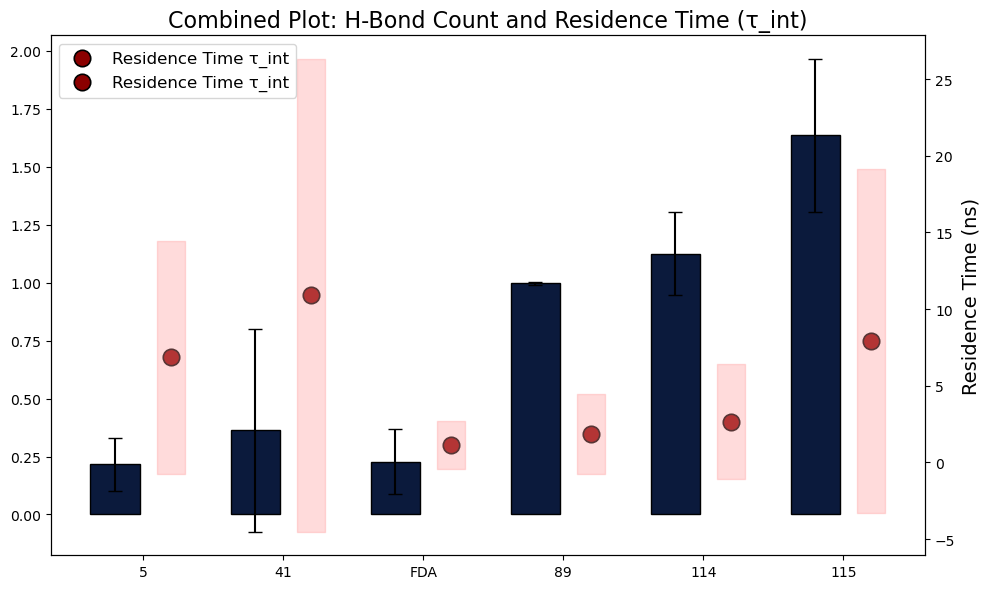

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
complexes = np.array(["5", "41", "FDA", "89", "114", "115"])
hbond_mean = np.array([0.217, 0.363, 0.228, 0.997, 1.125, 1.636])
hbond_sd = np.array([0.115, 0.437, 0.140, 0.007, 0.180, 0.329])

res_time = np.array([6.848, 10.903, 1.123, 1.852, 2.660, 7.928])
res_sd = np.array([7.592, 15.413, 1.571, 2.607, 3.750, 11.201])

x = np.arange(len(complexes))

plt.figure(figsize=(10, 6))

# --- Bar chart for H-bond mean (dark navy) ---
plt.bar(
    x - 0.2,
    hbond_mean,
    width=0.35,
    yerr=hbond_sd,
    capsize=5,
    color="#0b1a3c",
    edgecolor="black",
    label="Avg H-Bond Count (±SD)"
)

# --- Scatter for Residence Time (dark red) ---
ax2 = plt.gca().twinx()
ax2.scatter(
    x + 0.2,
    res_time,
    s=140,
    color="#8b0000",
    edgecolors="black",
    linewidth=1.2,
    label="Residence Time τ_int"
)

# --- SD shadow band (light red) ---
for i in range(len(x)):
    ax2.fill_between(
        [x[i] + 0.1, x[i] + 0.3],
        res_time[i] - res_sd[i],
        res_time[i] + res_sd[i],
        color="#ff9999",
        alpha=0.35
    )

# X-axis labels
plt.xticks(x, complexes, fontsize=12)

# Axis labels
plt.xlabel("Complex ID", fontsize=14)
plt.ylabel("Average H-Bond Count", fontsize=14)
ax2.set_ylabel("Residence Time (ns)", fontsize=14)

# Title
plt.title("Combined Plot: H-Bond Count and Residence Time (τ_int)", fontsize=16)

# Legends
lines_1, labels_1 = plt.gca().get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()


In [53]:
df = pd.read_csv("smd_summary.csv", sep=",")


In [54]:
df = pd.read_csv("smd_summary.csv", sep=";")


In [55]:
df = pd.read_csv("smd_summary.csv", sep=r"\s+")
print(df.columns)
print(df)


Index(['Complex,Replicate,Fmax(kJ/mol/nm),Rupture_Time(ps),Rupture_Distance(nm)'], dtype='object')
  Complex,Replicate,Fmax(kJ/mol/nm),Rupture_Time(ps),Rupture_Distance(nm)
0                      5,1,735.959,1669.3000,1.32581                     
1                      5,2,821.915,2106.8000,1.61634                     
2                       5,3,763.64,1709.3000,1.30657                     
3                     64,1,720.618,1746.5000,1.74039                     
4                     64,2,656.703,1527.3000,1.61447                     
5                       64,3,764.2,1740.6000,1.67687                     
6                    115,1,784.574,1665.7000,1.28421                     
7                    115,2,825.939,1803.6000,1.35628                     
8                    115,3,942.991,1980.8000,1.33077                     


In [56]:
import pandas as pd

df = pd.read_csv("smd_summary.csv", sep=",", header=0)

# If still one column appears, split it manually:
if df.shape[1] == 1:
    df = df[df.columns[0]].str.split(",", expand=True)
    df.columns = ['Complex', 'Replicate', 'Fmax(kJ/mol/nm)', 
                  'Rupture_Time(ps)', 'Rupture_Distance(nm)']

print(df)


   Complex  Replicate  Fmax(kJ/mol/nm)  Rupture_Time(ps)  Rupture_Distance(nm)
0        5          1          735.959            1669.3               1.32581
1        5          2          821.915            2106.8               1.61634
2        5          3          763.640            1709.3               1.30657
3       64          1          720.618            1746.5               1.74039
4       64          2          656.703            1527.3               1.61447
5       64          3          764.200            1740.6               1.67687
6      115          1          784.574            1665.7               1.28421
7      115          2          825.939            1803.6               1.35628
8      115          3          942.991            1980.8               1.33077


In [58]:
import pandas as pd

df = pd.read_csv("smd_summary.csv")   # your cleaned file

# Convert numeric columns
df[['Complex','Replicate']] = df[['Complex','Replicate']].astype(int)
df[['Fmax(kJ/mol/nm)','Rupture_Time(ps)','Rupture_Distance(nm)']] = \
    df[['Fmax(kJ/mol/nm)','Rupture_Time(ps)','Rupture_Distance(nm)']].astype(float)

# Group statistics
stats = df.groupby("Complex").agg(
    Mean_Fmax = ('Fmax(kJ/mol/nm)', 'mean'),
    SD_Fmax   = ('Fmax(kJ/mol/nm)', 'std'),
    Mean_Time = ('Rupture_Time(ps)', 'mean'),
    SD_Time   = ('Rupture_Time(ps)', 'std'),
    Mean_Dist = ('Rupture_Distance(nm)', 'mean'),
    SD_Dist   = ('Rupture_Distance(nm)', 'std')
).reset_index()

print(stats)
stats.to_csv("smd_group_stats.csv", index=False)


   Complex   Mean_Fmax    SD_Fmax    Mean_Time     SD_Time  Mean_Dist  \
0        5  773.838000  43.876051  1828.466667  241.872039   1.416240   
1       64  713.840333  54.068048  1671.466667  124.886842   1.677243   
2      115  851.168000  82.166680  1816.700000  157.957937   1.323753   

    SD_Dist  
0  0.173558  
1  0.062961  
2  0.036544  


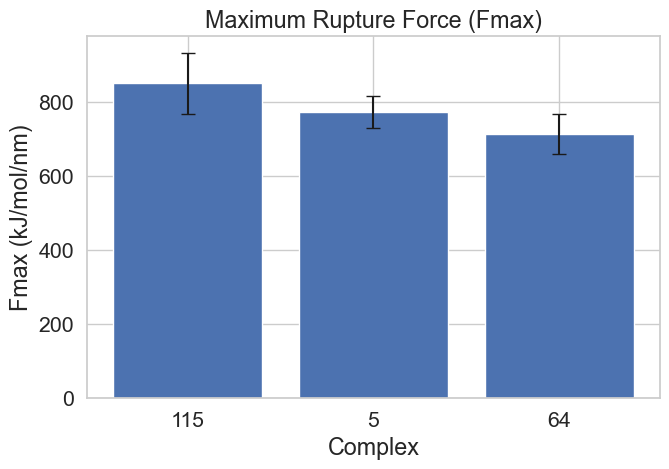

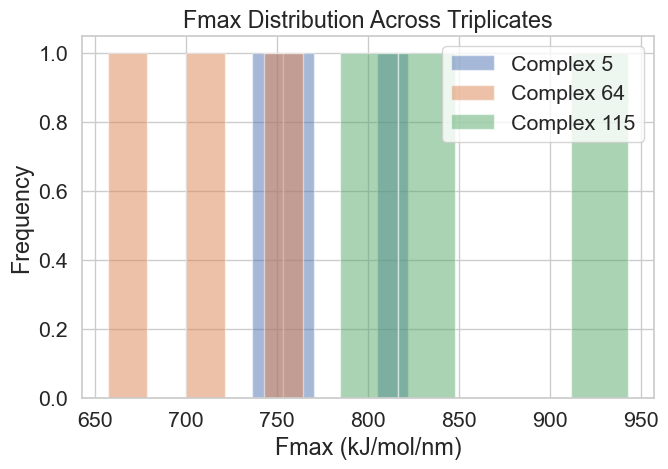

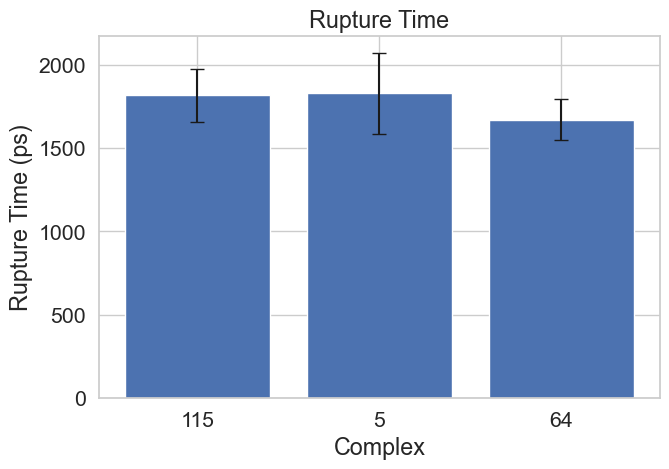

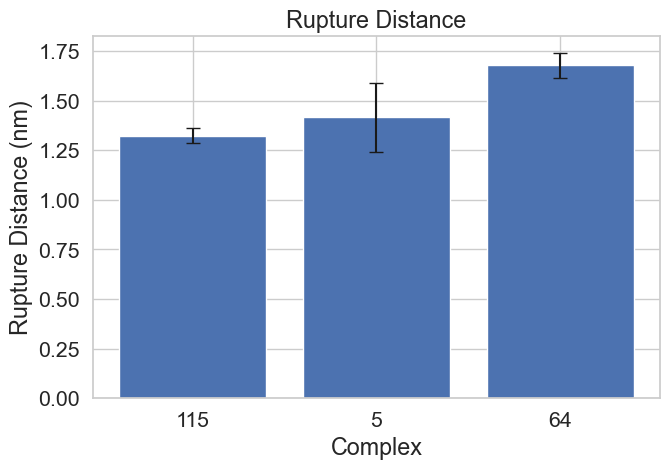

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("smd_summary.csv")

# Convert relevant columns to numeric
df["Complex"] = df["Complex"].astype(str)
df["Fmax(kJ/mol/nm)"] = df["Fmax(kJ/mol/nm)"].astype(float)
df["Rupture_Time(ps)"] = df["Rupture_Time(ps)"].astype(float)
df["Rupture_Distance(nm)"] = df["Rupture_Distance(nm)"].astype(float)

# Grouped statistics
stats = df.groupby("Complex").agg(
    Mean_Fmax=("Fmax(kJ/mol/nm)", "mean"),
    SD_Fmax=("Fmax(kJ/mol/nm)", "std"),
    Mean_Time=("Rupture_Time(ps)", "mean"),
    SD_Time=("Rupture_Time(ps)", "std"),
    Mean_Dist=("Rupture_Distance(nm)", "mean"),
    SD_Dist=("Rupture_Distance(nm)", "std")
).reset_index()

# ------------ Plot Fmax ------------
plt.figure(figsize=(7,5))
plt.bar(stats["Complex"], stats["Mean_Fmax"], yerr=stats["SD_Fmax"], capsize=5)
plt.xlabel("Complex")
plt.ylabel("Fmax (kJ/mol/nm)")
plt.title("Maximum Rupture Force (Fmax)")
plt.tight_layout()
plt.savefig("Fmax_plot.png", dpi=300)
plt.show()

# ------------ Distribution plot Fmax ------------
plt.figure(figsize=(7,5))
for comp in df["Complex"].unique():
    subset = df[df["Complex"] == comp]["Fmax(kJ/mol/nm)"]
    plt.hist(subset, alpha=0.5, label=f"Complex {comp}", bins=5)

plt.xlabel("Fmax (kJ/mol/nm)")
plt.ylabel("Frequency")
plt.title("Fmax Distribution Across Triplicates")
plt.legend()
plt.tight_layout()
plt.savefig("Fmax_distribution.png", dpi=300)
plt.show()

# ------------ Rupture Time Plot ------------
plt.figure(figsize=(7,5))
plt.bar(stats["Complex"], stats["Mean_Time"], yerr=stats["SD_Time"], capsize=5)
plt.xlabel("Complex")
plt.ylabel("Rupture Time (ps)")
plt.title("Rupture Time")
plt.tight_layout()
plt.savefig("Rupture_time_plot.png", dpi=300)
plt.show()

# ------------ Rupture Distance Plot ------------
plt.figure(figsize=(7,5))
plt.bar(stats["Complex"], stats["Mean_Dist"], yerr=stats["SD_Dist"], capsize=5)
plt.xlabel("Complex")
plt.ylabel("Rupture Distance (nm)")
plt.title("Rupture Distance")
plt.tight_layout()
plt.savefig("Rupture_distance_plot.png", dpi=300)
plt.show()


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smd_summary.csv")

# Ensure numeric columns
df["Complex"] = df["Complex"].astype(str)
df["Replicate"] = df["Replicate"].astype(int)
df["Fmax"] = df["Fmax"].astype(float)
df["Rupture_Time"] = df["Rupture_Time"].astype(float)
df["Rupture_Distance"] = df["Rupture_Distance"].astype(float)
df["Work"] = df["Work"].astype(float)

df.head()


Complex  Replicate     Fmax  Rupture_Time  Rupture_Distance     Work
0       5          1  735.959        1669.3           1.32581  1263.29
1       5          2  821.915        2106.8           1.61634  1408.03
2       5          3  763.640        1709.3           1.30657  1305.70
3      64          1  720.618        1746.5           1.74039  1286.10
4      64          2  656.703        1527.3           1.61447  1118.00

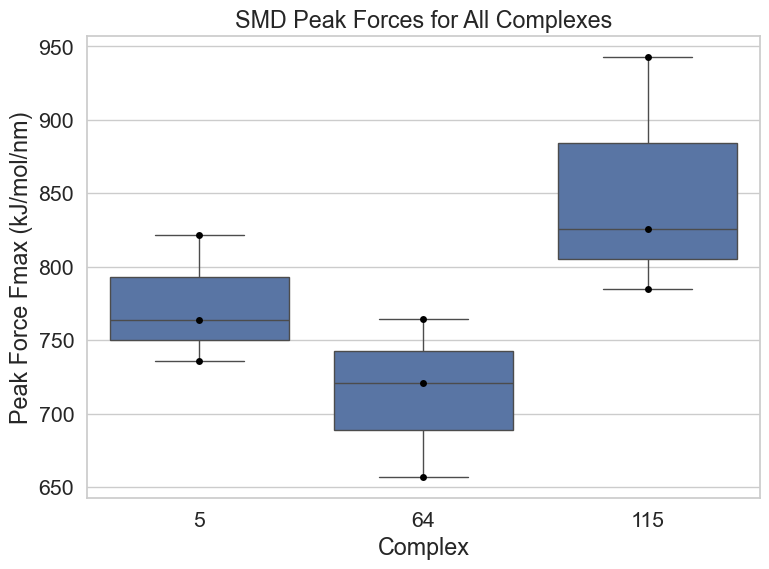

In [71]:
#Fmax Boxplot (Peak Force Comparison)
plt.figure(figsize=(8,6))
sns.boxplot(x="Complex", y="Fmax", data=df)
sns.swarmplot(x="Complex", y="Fmax", data=df, color="black")
plt.ylabel("Peak Force Fmax (kJ/mol/nm)")
plt.title("SMD Peak Forces for All Complexes")
plt.tight_layout()
plt.show()


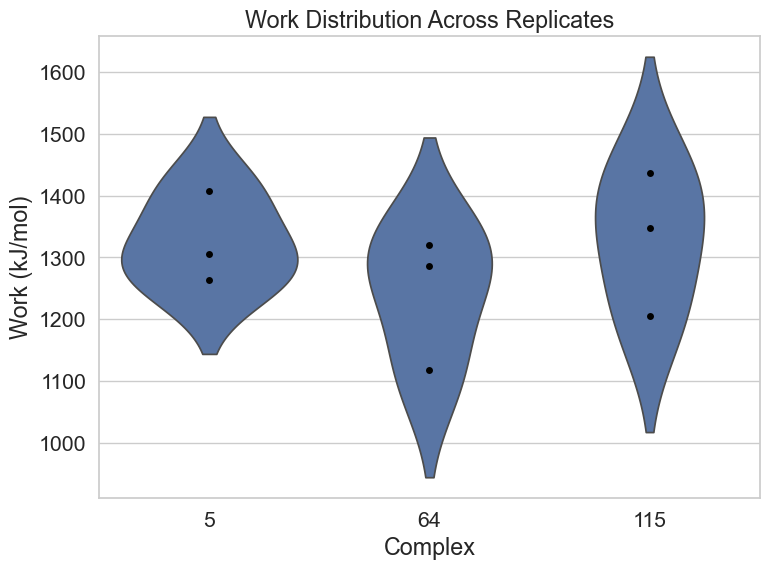

In [67]:
#Work (∫F·dx) Plot
plt.figure(figsize=(8,6))
sns.violinplot(x="Complex", y="Work", data=df, inner=None)
sns.swarmplot(x="Complex", y="Work", data=df, color="black")
plt.ylabel("Work (kJ/mol)")
plt.title("Work Distribution Across Replicates")
plt.tight_layout()
plt.show()


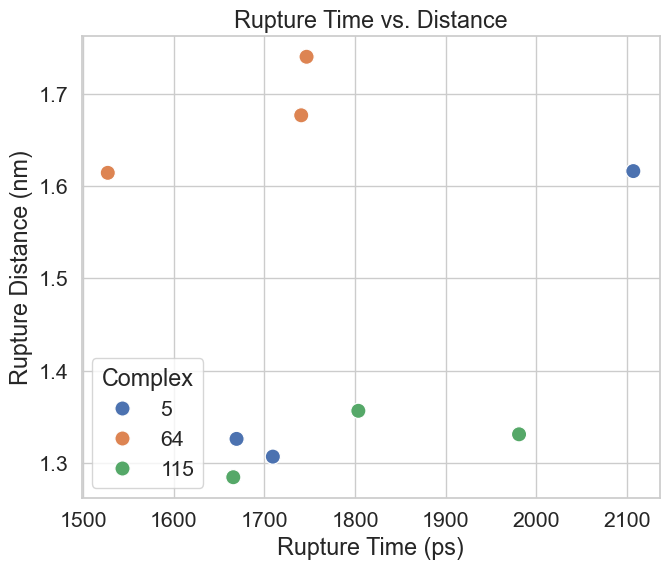

In [68]:
#Rupture Time vs Distance Scatter
plt.figure(figsize=(7,6))
sns.scatterplot(x="Rupture_Time", y="Rupture_Distance", hue="Complex", data=df, s=120)
plt.xlabel("Rupture Time (ps)")
plt.ylabel("Rupture Distance (nm)")
plt.title("Rupture Time vs. Distance")
plt.tight_layout()
plt.show()


In [69]:
summary = df.groupby("Complex").agg(
    mean_Fmax = ("Fmax","mean"),
    sd_Fmax = ("Fmax","std"),
    mean_Work = ("Work","mean"),
    sd_Work = ("Work","std"),
    mean_RupDist = ("Rupture_Distance","mean"),
    sd_RupDist = ("Rupture_Distance","std")
)

summary


mean_Fmax    sd_Fmax    mean_Work     sd_Work  mean_RupDist  \
Complex                                                                 
115      851.168000  82.166680  1330.110000  117.003272      1.323753   
5        773.838000  43.876051  1325.673333   74.408450      1.416240   
64       713.840333  54.068048  1241.463333  108.280354      1.677243   

         sd_RupDist  
Complex              
115        0.036544  
5          0.173558  
64         0.062961